# eazy-gnuplot 'gnuplot Cookbook' Companion

This document is a companion for [eazy-gnuplot](https://github.com/guicho271828/eazy-gnuplot)  users going through the 'excellent book by Lee Philips ['gnuplot Cookbook'](https://www.packtpub.com/big-data-and-business-intelligence/gnuplot-cookbook) from Packt Publishing. I highly recommend buying this book. 

In this companion we demonstrate implementing the plots in the book using `eazy-gnuplot`. Liberties have been taken plots may not follow exactly what is shown in the book (when they don't they follow the spirit).

This document is an iPython notebook if you want to run the note book on your system please clone cl-jupyter (https://github.com/fredokun/cl-jupyter.git) into your `quicklisp/local-projects` directory and follow the instructions in the README.md. Clone eazy-gnuplot or download this notebook at https://github.com/guicho271828/eazy-gnuplot/blob/master/docs/eazy-gnuplot-cookbook-companion.ipynb. Finally execute 'ipython3 notebook' from a shell in the same directory uazy-gnuplot-cookbook-companion.ipynb and openthe notebook in Jupyter web interface.

In [1]:
;png-from-file is used to display png files in cl-jupyter if not using cl-jupyter create a dummy function
(when (not (fboundp 'png-from-file)) (defun png-from-file (f) f))

NIL

In [2]:
;We need a directory called images to store our plots make sure it exists
(ensure-directories-exist "images/")

"images/"

In [3]:
(quicklisp-client:quickload '(:eazy-gnuplot :clml.statistics :clml.utility))
(use-package :eazy-gnuplot)

To load "eazy-gnuplot":
  Load 1 ASDF system:
    eazy-gnuplot

; Loading "eazy-gnuplot"
.
To load "clml.statistics":
  Load 1 ASDF system:
    clml.statistics

; Loading "clml.statistics"

To load "clml.utility":
  Load 1 ASDF system:
    clml.utility

; Loading "clml.utility"
....


T

# 1 Plotting Curves Boxes Points and More



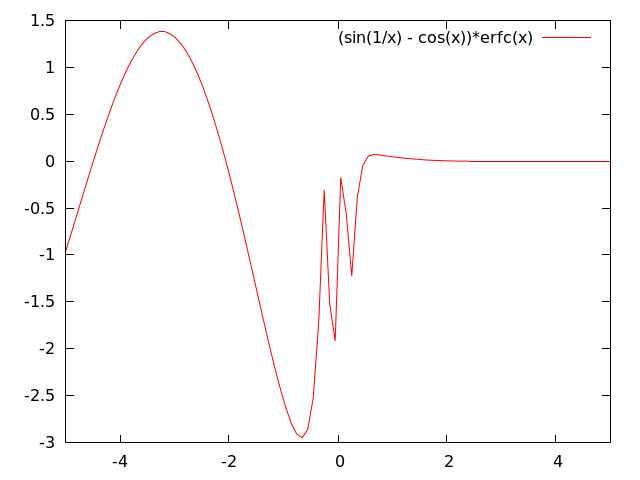

In [4]:
(defun function-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :terminal '(pngcairo) :output output)
    (func-plot "[-5:5] (sin(1/x) - cos(x))*erfc(x)"))
  output)
(png-from-file (function-plot "images/function-plot.png"))


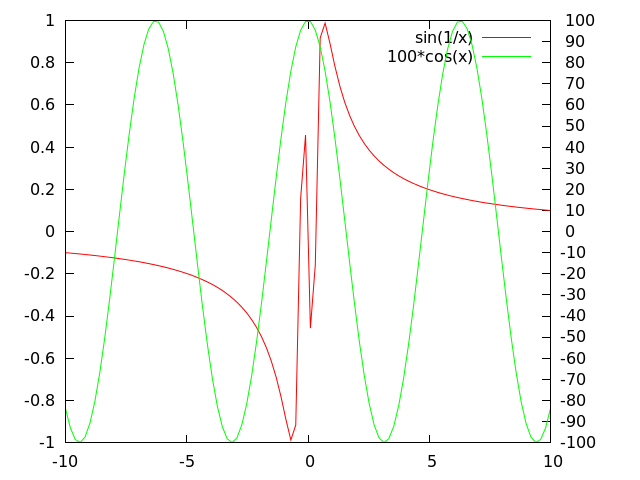

In [5]:
(defun seperate-y-axis-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :terminal '(pngcairo) :output output :y2tics '(-100 10) :ytics
              :nomirror)
    (func-plot "sin(1/x) axis x1y1,100*cos(x) axis x1y2"))
  output)
(png-from-file (seperate-y-axis-plot "images/seperate-y-axis-plot.png"))


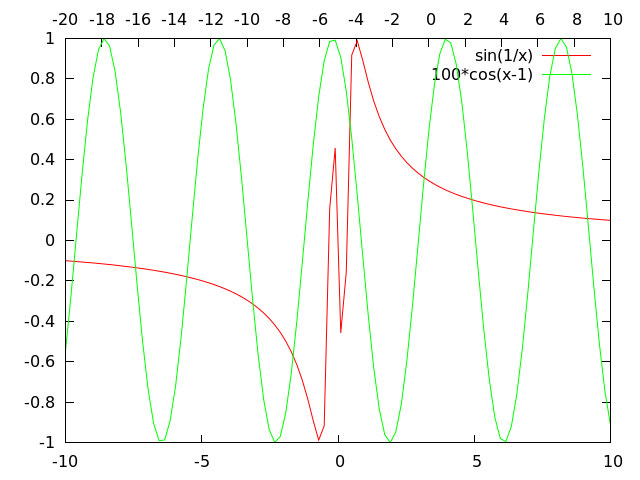

In [6]:
(defun seperate-y-axis2-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :terminal '(pngcairo) :output output :x2tics '(-20 2) :xtics
              :nomirror :xrange '("[-10:10]") :x2range '("[-20:10]") :samples
              100)
    (func-plot "sin(1/x) axis x1y1, 100*cos(x-1) axis x2y2"))
  output)
(png-from-file (seperate-y-axis2-plot "images/seperate-y-axis2-plot.png"))


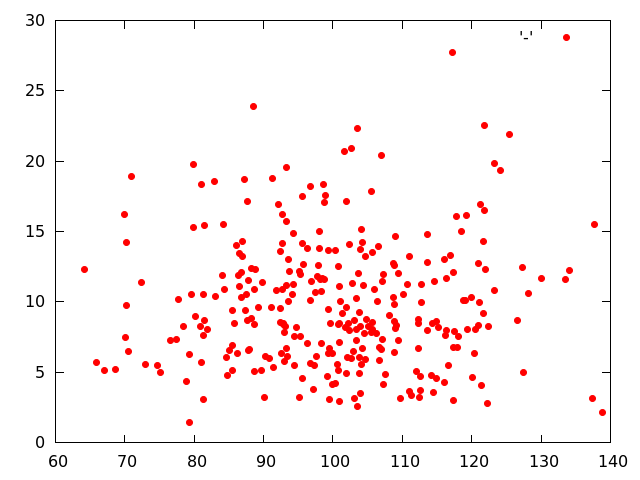

In [7]:
(defun scatter-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :terminal '(pngcairo) :output output)
    (plot
     (lambda ()
       (loop for p in (map 'list (lambda (x y) (list x y))
                           (clml.statistics:rand-n
                            (clml.statistics:chi-square-distribution 100) 300)
                           (clml.statistics:rand-n
                            (clml.statistics:chi-square-distribution 10) 300))
             do (format t "~&~{~a~^ ~}" p)))
     :with '(:points :pt 7)))
  output)
(png-from-file (scatter-plot "images/scatter-plot.png"))


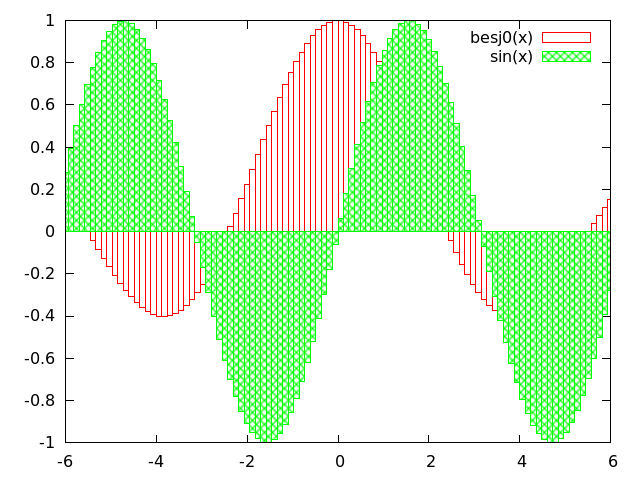

In [8]:
(defun plotting-boxes-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :terminal '(pngcairo) :output output :style '(:fill :pattern))
    (func-plot "[-6:6] besj0(x) with boxes, sin(x) with boxes"))
  output)
(png-from-file (plotting-boxes-plot "images/plotting-boxes-plot.png"))


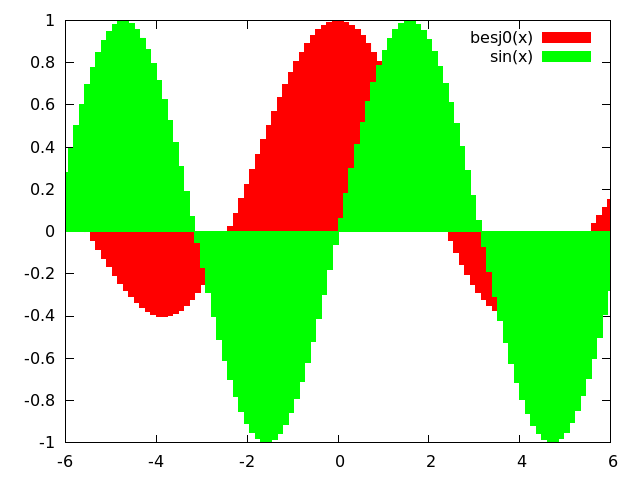

In [9]:
(defun plotting-boxes-solid-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :terminal '(pngcairo) :output output :style '(:fill :solid))
    (func-plot "[-6:6] besj0(x) with boxes, sin(x) with boxes"))
  output)
(png-from-file
 (plotting-boxes-solid-plot "images/plotting-boxes-solid-plot.png"))


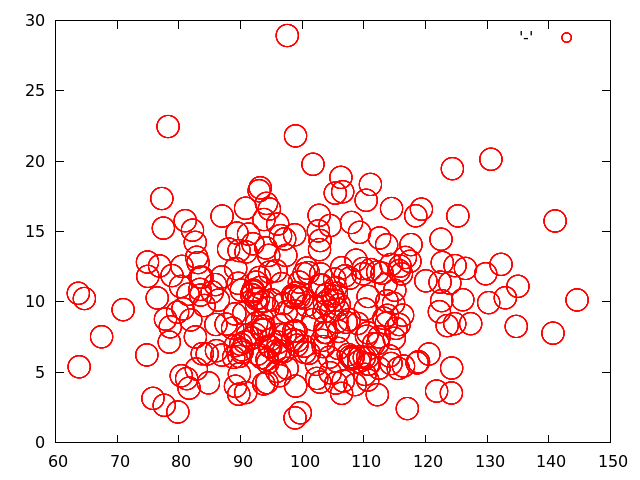

In [10]:
(defun plotting-circles-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :terminal '(pngcairo) :output output)
    (plot
     (lambda ()
       (loop for p in (map 'list (lambda (x y z) 
                                         (declare (ignorable z))
                                         (list x y))
                            (clml.statistics:rand-n
                              (clml.statistics:chi-square-distribution 100) 300)
                            (clml.statistics:rand-n
                              (clml.statistics:chi-square-distribution 10) 300)
                            (clml.statistics:rand-n
                              (clml.statistics:chi-square-distribution 1) 300))
             do (format t "~&~{~a~^ ~}" p)))
     :with '(:circles)))
  output)
(png-from-file (plotting-circles-plot "images/plotting-circles-plot.png"))


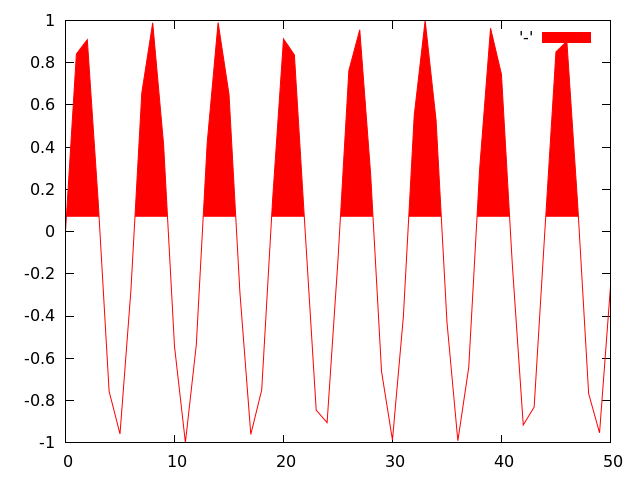

In [11]:
(defun drawing-filled-curves-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :terminal '(pngcairo) :output output)
    (plot
     (lambda ()
       (loop for i from 0 upto 50
             do (format t "~&~a ~a" i (sin i))))
     :with '(:filledcurves :above :y1 = 0.07)))
  output)
(png-from-file
 (drawing-filled-curves-plot "images/drawing-filled-curves-plot.png"))


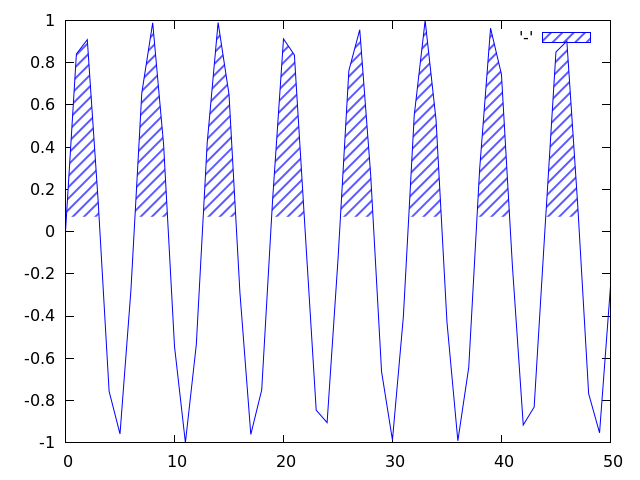

In [12]:
(defun drawing-blue-filled-curves (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :terminal '(pngcairo) :output output :style '(fill pattern 5))
    (plot
     (lambda ()
       (loop for i from 0 upto 50
             do (format t "~&~a ~a" i (sin i))))
     :lt '(rgb "blue") :with '(:filledcurves :above :y1 = 0.07)))
  output)
(png-from-file
 (drawing-blue-filled-curves "images/drawing-blue-filled-curves.png"))


This exercise requires Gnuplot 5



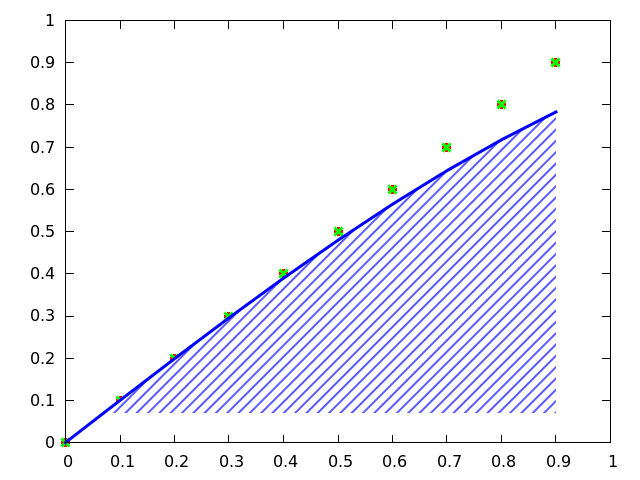

In [13]:
(defun filled-curves-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :terminal '(:pngcairo) :output output :style
              '(fill pattern 5))
    (plot
     (lambda ()
       (loop for i from 0 upto 1 by 0.1
             do (format t "~&~a ~a ~a" i i (sin i))))
     :using '(1 2 3) :lw (list 3 'notitle) :using '(1 2)
     :lw (list 3 'notitle) :using '(1 3) :lw '(3 notitle) :with
     '(:filledcurves :above :y1 = 0.07)))
  output)
(png-from-file (filled-curves-plot "images/filled-curves-plot.png"))


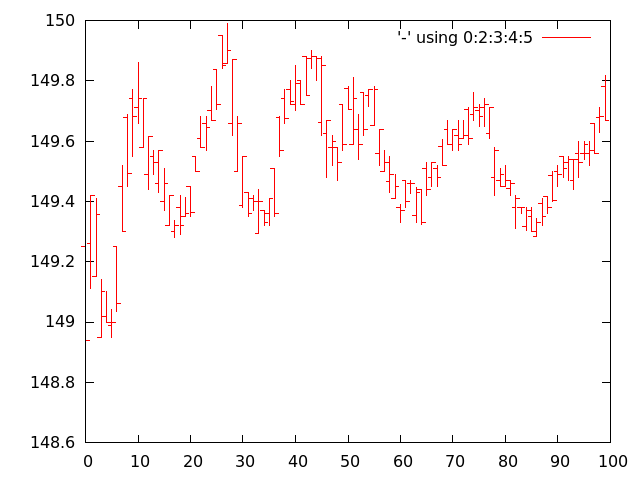

In [14]:
(defun finance-bars-plot (output)
  (let ((s
         (clml.utility.data:fetch
          "http://www.google.com/finance/getprices?i=60&p=10d&f=d,o,h,l,c,v&df=cpct&q=ibm"
          :stream t)))
    (clml.utility.data:process-finance-header s)
    (with-plots (*standard-output* :debug nil)
      (gp-setup :terminal '(pngcairo) :output output :bars 2)
      (plot
       (lambda ()
         (loop for row across (subseq
                               (clml.utility.csv:read-csv-stream s :type-spec
                                                                 '(float float
                                                                         float
                                                                         float
                                                                         float
                                                                         float))
                               0 100)
               do (format t "~&~{~a~^ ~}" (coerce row 'list))))
       :using '(0 2 3 4 5) :with 'financebars)))
  output)
(png-from-file (finance-bars-plot "images/finance-bars-plot.png"))


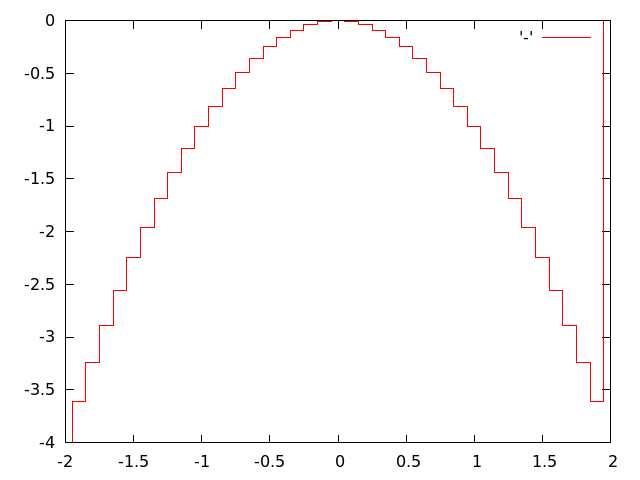

In [15]:
(defun histogram-like-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :terminal '(pngcairo) :output output)
    (plot
     (lambda ()
       (loop for i from -2 upto 2 by 0.1
             do (format t "~&~a ~a" i (- (* i i)))))
     :with '(:histeps)))
  output)
(png-from-file (histogram-like-plot "images/histogram-like-plot.png"))


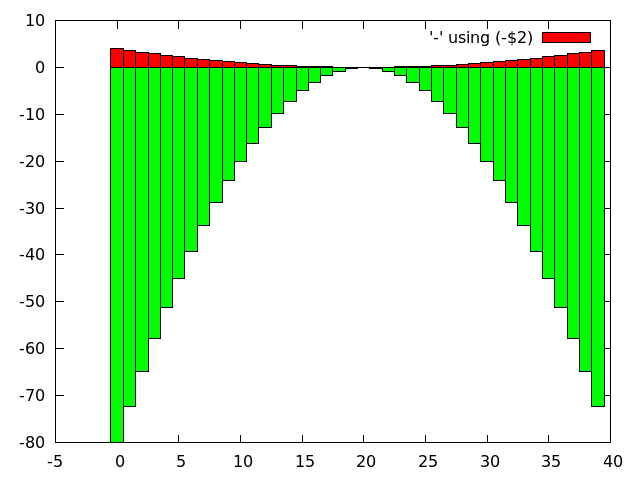

In [16]:
(defun histogram-stacked-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :terminal '(pngcairo) :output output :style
              '(fill solid 1.0 border lt -1) :style '(data histograms) :style
              '(histogram rowstacked))
    (plot
     (lambda ()
       (loop for i from -2 upto 2 by 0.1
             do (format t "~&~a ~a ~a ~a" i (- (* i i)) (* i i) i)))
     :using (list "(-$2)") :using (list "(20*$2)") :notitle nil))
  output)
(png-from-file (histogram-stacked-plot "images/histogram-stacked-plot.png"))


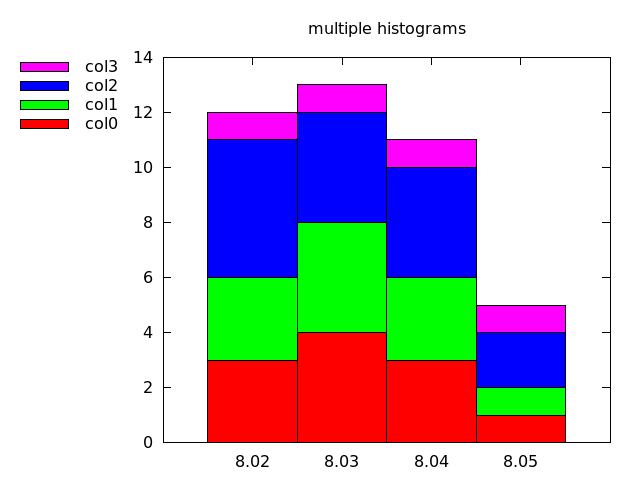

In [17]:
(defun multiple-histograms-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title
              "multiple histograms" :key '(invert reverse left outside) :key
              '(autotitle columnheader) :style '(data histogram) :style
              '(histogram rowstacked) :style '(fill solid border -1))
    (plot
     (lambda ()
       (loop for r in '((8.01 1 5 1) (8.02 3 5 1) (8.03 4 4 1) (8.04 3 4 1)
                        (8.05 1 2 1))
             do (format t "~&~{~^~a ~}" r)))
     :using '(2 "xtic(1)") :title "col0" :using 2 :title "col1" :using 3 :title
     "col2" :using 4 :title "col3"))
  output)
(png-from-file
 (multiple-histograms-plot "images/multiple-histograms-plot.png"))


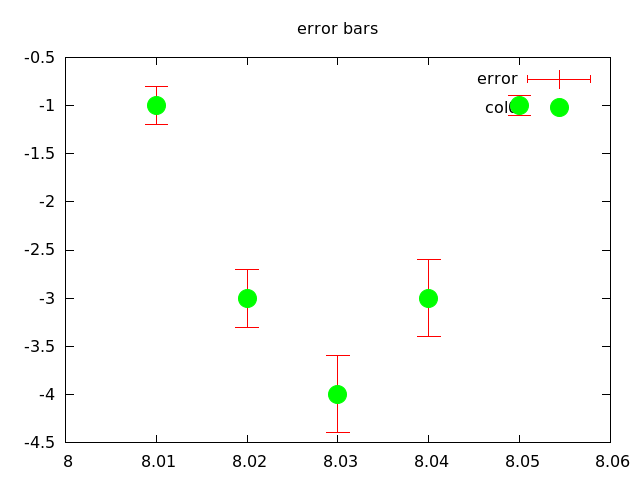

In [18]:
(defun error-bars-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "error bars" :bars 3
              :pointsize 3 :xrange (list "[ 8.0:8.06]"))
    (plot
     (lambda ()
       (loop for r in '((8.01 1 0.2) (8.02 3 0.3) (8.03 4 0.4) (8.04 3 0.4)
                        (8.05 1 0.1))
             do (format t "~&~{~^~a ~}" r)))
     :using "1:(-$2):3 with errorbars" :title "error" :using "1:(-$2):3 pt 7"
     :title "col0"))
  output)
(png-from-file (error-bars-plot "images/error-bars-plot.png"))


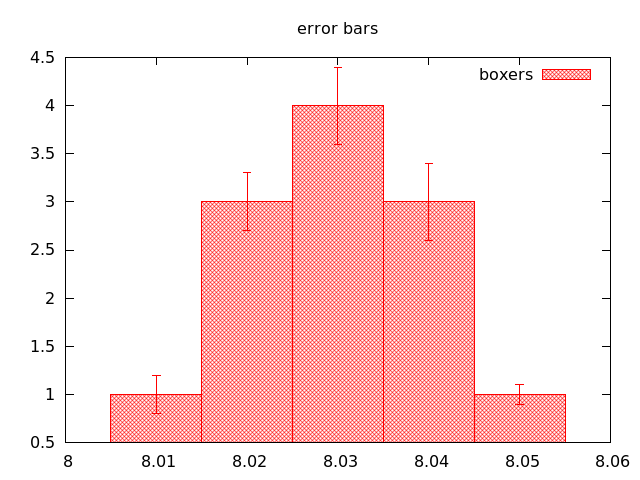

In [19]:
(defun boxerror-bars-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "error bars" :style
              '(fill pattern 2 border) :xrange (list "[8.0:8.06]"))
    (plot
     (lambda ()
       (loop for r in '((8.01 1 0.2) (8.02 3 0.3) (8.03 4 0.4) (8.04 3 0.4)
                        (8.05 1 0.1))
             do (format t "~&~{~^~a ~}" r)))
     :using "1:($2):3 with boxerrorbars" :title "boxers"))
  output)
(png-from-file (boxerror-bars-plot "images/boxerror-bars-plot.png"))


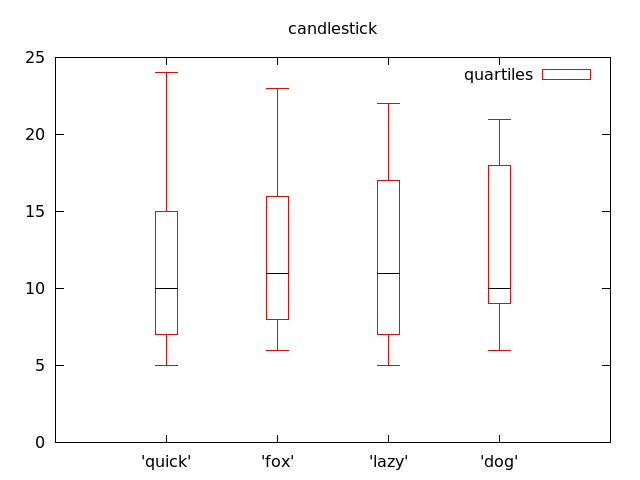

In [20]:
(defun candlestick-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "candlestick"
              :xrange (list "[0:5]") :yrange (list "[0:25]") :boxwidth
              '(0.2 absolute))
    (plot
     (lambda ()
       (loop for r in '((1 5 7 10 15 24 0.3 "'quick'")
                        (2 6 8 11 16 23 0.4 "'fox'")
                        (3 5 7 11 17 22 0.5 "'lazy'")
                        (4 6 9 10 18 21 0.3 "'dog'"))
             do (format t "~&~{~^~a ~}" r)))
     :using
     (list
      "1:3:2:6:5:xticlabels(8) with candlesticks title 'quartiles' whiskerbars")
     :using (list "1:4:4:4:4 with candlesticks lt -1 notitle")))
  output)
(png-from-file (candlestick-plot "images/candlestick-plot.png"))


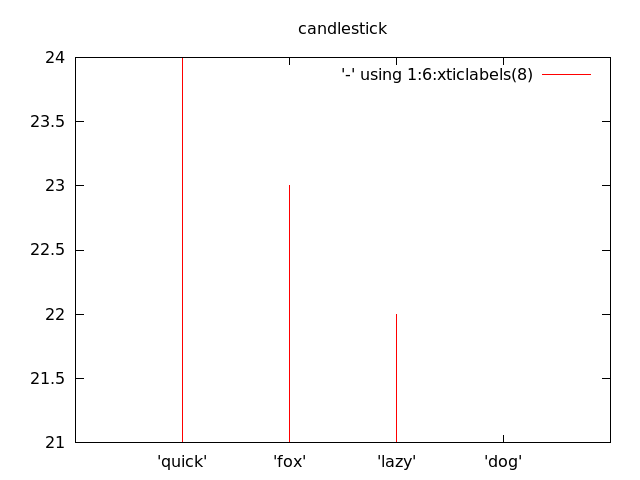

In [21]:
(defun impluse-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "candlestick"
              :xrange (list "[0:5]"))
    (plot
     (lambda ()
       (loop for r in '((1 5 7 10 15 24 0.3 "'quick'")
                        (2 6 8 11 16 23 0.4 "'fox'")
                        (3 5 7 11 17 22 0.5 "'lazy'")
                        (4 6 9 10 18 21 0.3 "'dog'"))
             do (format t "~&~{~^~a ~}" r)))
     :using (list "1:6:xticlabels(8) with impulses")))
  output)
(png-from-file (impluse-plot "images/impluse-plot.png"))


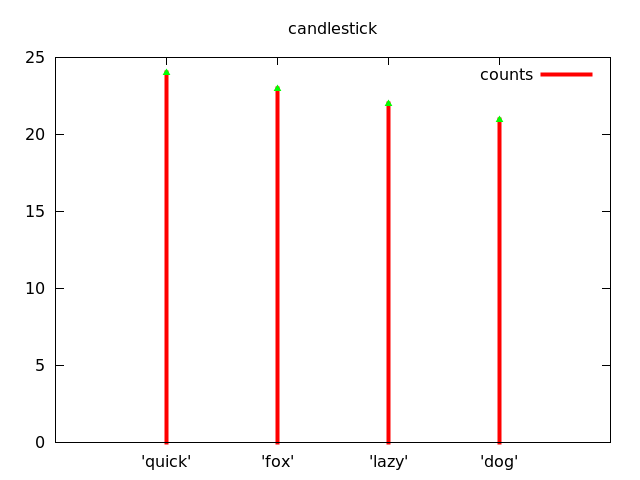

In [22]:
(defun stem-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "candlestick"
              :xrange (list "[0:5]") :yrange (list "[0:25]"))
    (plot
     (lambda ()
       (loop for r in '((1 5 7 10 15 24 0.3 "'quick'")
                        (2 6 8 11 16 23 0.4 "'fox'")
                        (3 5 7 11 17 22 0.5 "'lazy'")
                        (4 6 9 10 18 21 0.3 "'dog'"))
             do (format t "~&~{~^~a ~}" r)))
     :using '(1 6 "xticlabels(8)") :with '(impulses lw 4 title "counts") :using
     '(1 6) :with '(points pt 9 notitle)))
  output)
(png-from-file (stem-plot "images/stem-plot.png"))


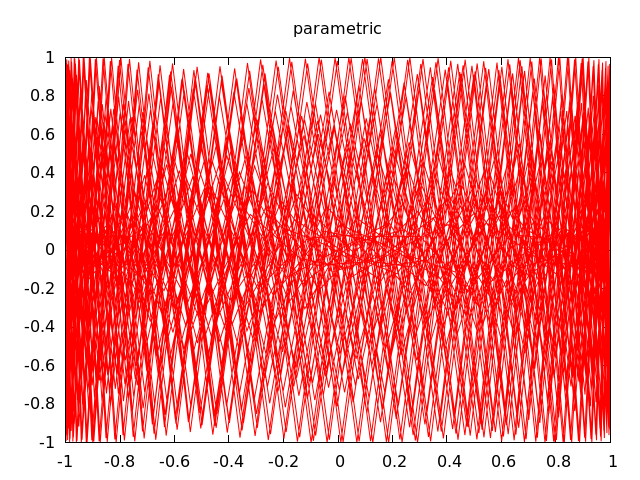

In [23]:
(defun parametric-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "parametric"
              :samples 1000 :parametric 'nil :trange (list "[-7:20]"))
    (func-plot "sin(7*t), sin(111*t)" :notitle 'nil))
  output)
(png-from-file (parametric-plot "images/parametric-plot.png"))


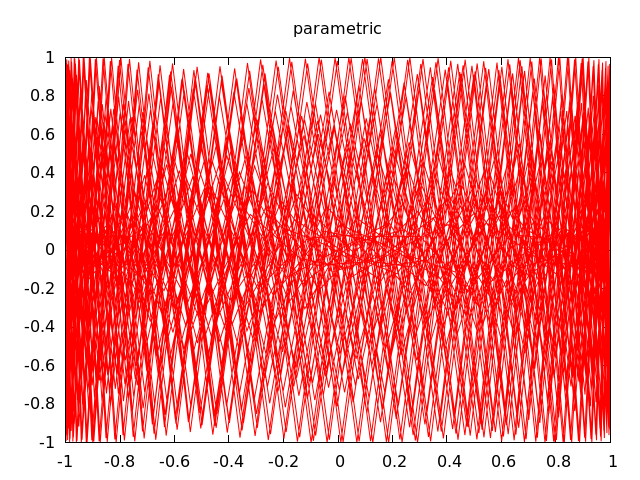

In [24]:
(defun parametric2-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "parametric"
              :samples 1000 :parametric 'nil :trange (list "[-7:20]"))
    (func-plot "sin(7*t), sin(111*t)" :notitle 'nil))
  output)
(png-from-file (parametric2-plot "images/parametric2-plot.png"))


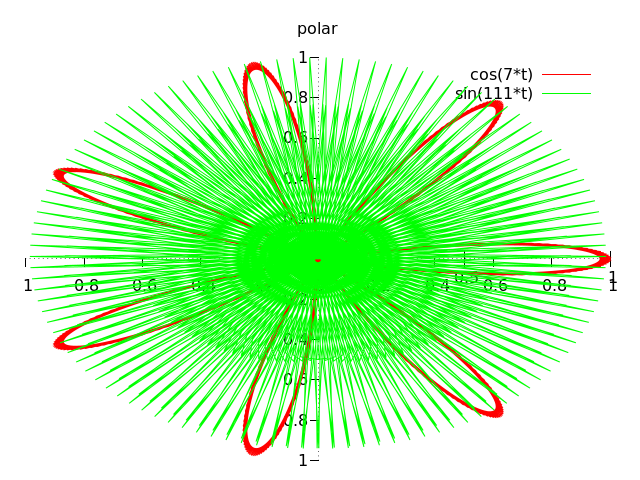

In [25]:
(defun polar-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "polar" :xtics
              '(axis nomirror) :ytics '(axis nomirror) :zeroaxis 'nil :samples
              500 :polar 'nil :trange (list "[0:12*pi]"))
    (gp :unset :border)
    (gp :unset :raxis)
    (func-plot "cos(7*t), sin(111*t)"))
  output)
(png-from-file (polar-plot "images/polar-plot.png"))


#2 Annotating With Labels and Legends



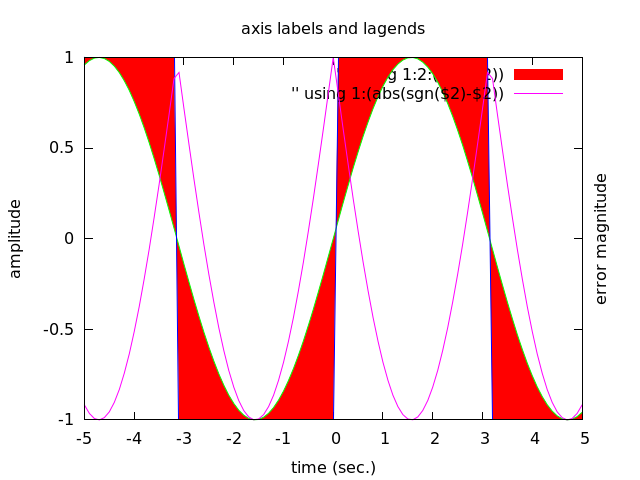

In [26]:
(defun labeling-the-axis-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title
              "axis labels and lagends" :parametric 'nil :xlabel "time (sec.)"
              :ylabel "amplitude" :y2label "error magnitude")
    (plot
     (lambda ()
       (loop for x from -5 upto 5 by 0.1
             do (format t "~&~a ~a ~a" x (sin x) (log x))))
     :using '(1 2 "(sgn($2))") :with 'filledcurves :using '(1 2) :with
     '(lines notitle) :using '(1 "(sgn($2))") :with '(lines notitle) :using
     '(1 "(abs(sgn($2)-$2))") :with '(lines axis x1y2)))
  output)
(png-from-file (labeling-the-axis-plot "images/labeling-the-axis-plot.png"))


### This plot generates a postscript file
If you have a postscript viewer like *ghostscript* you open the file at the path given by the output of `setting-label-size-plot. Other wise we have included a conversion of it to a png below

In [27]:
(defun setting-label-size-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :terminal '(postscript landscape "courier, 18") :output output
              :title "axis labels and lagends" :parametric 'nil :xlabel
              "time (sec.)" :ylabel "amplitude" :y2label "error magnitude")
    (plot
     (lambda ()
       (loop for x from -5 upto 5 by 0.1
             do (format t "~&~a ~a ~a" x (sin x) (log x))))
     :using '(1 2 "(sgn($2))") :with 'filledcurves :using '(1 2) :with
     '(lines notitle) :using '(1 "(sgn($2))") :with '(lines notitle) :using
     '(1 "(abs(sgn($2)-$2))") :with '(lines axis x1y2)))
  output)
(setting-label-size-plot "images/setting-label-size-plot.ps")


"images/setting-label-size-plot.ps"

<img src="images/setting-label-size-plot.png"/>

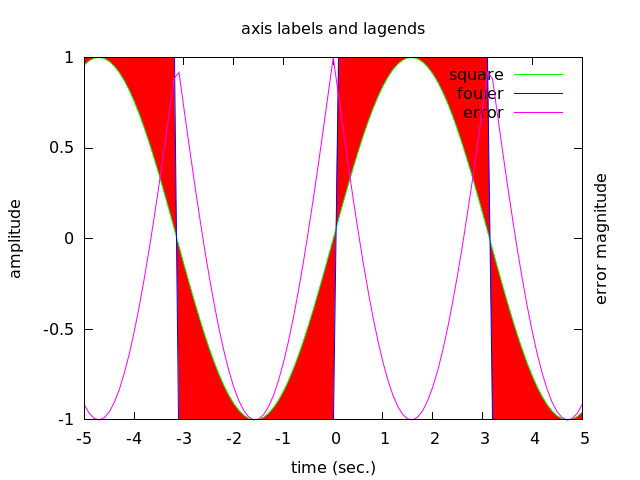

In [28]:
(defun adding-a-legend-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title
              "axis labels and lagends" :parametric 'nil :xlabel "time (sec.)"
              :ylabel "amplitude" :y2label "error magnitude")
    (plot
     (lambda ()
       (loop for x from -5 upto 5 by 0.1
             do (format t "~&~a ~a ~a" x (sin x) (log x))))
     :using '(1 2 "(sgn($2))") :with '(filledcurves notitle) :using '(1 2)
     :with '(lines title "square") :using '(1 "(sgn($2))") :with
     '(lines title "fouier") :using '(1 "(abs(sgn($2)-$2))") :with
     '(lines axis x1y2 title "error")))
  output)
(png-from-file (adding-a-legend-plot "images/adding-a-legend-plot.png"))


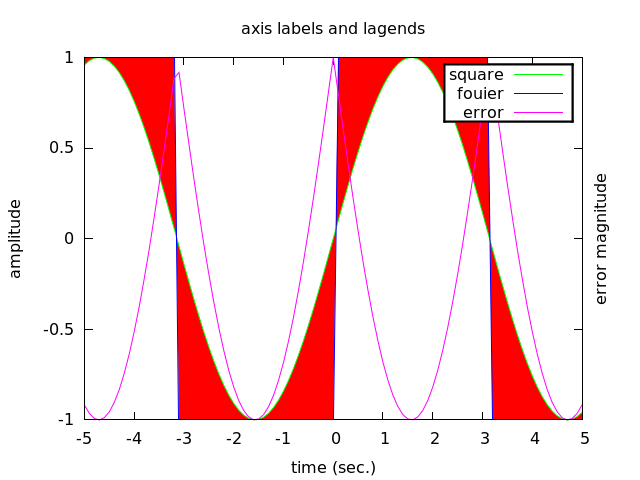

In [29]:
(defun putting-a-box-around-a-legend-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title
              "axis labels and lagends" :parametric 'nil :xlabel "time (sec.)"
              :ylabel "amplitude" :y2label "error magnitude" :key
              '(box lt -1 lw 2 opaque))
    (plot
     (lambda ()
       (loop for x from -5 upto 5 by 0.1
             do (format t "~&~a ~a ~a" x (sin x) (log x))))
     :using '(1 2 "(sgn($2))") :with '(filledcurves notitle) :using '(1 2)
     :with '(lines title "square") :using '(1 "(sgn($2))") :with
     '(lines title "fouier") :using '(1 "(abs(sgn($2)-$2))") :with
     '(lines axis x1y2 title "error"))
      )
  output)
(png-from-file
 (putting-a-box-around-a-legend-plot
  "images/putting-a-box-around-a-legend-plot.png"))


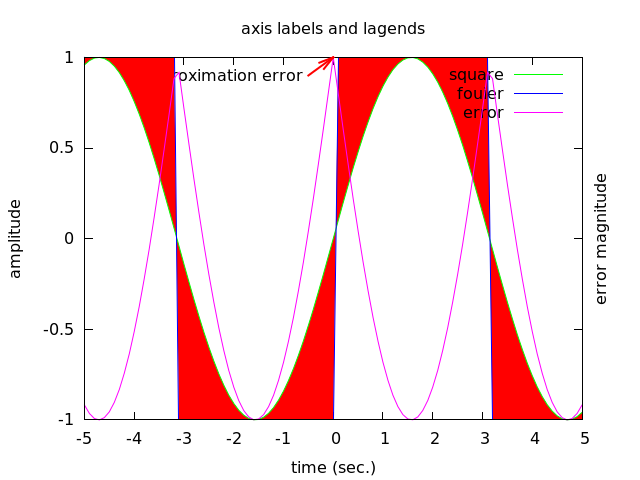

In [30]:
(defun adding-a-label-with-arrow-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title
              "axis labels and lagends" :parametric 'nil :xlabel "time (sec.)"
              :ylabel "amplitude" :y2label "error magnitude" :label
              '("\"approximation error\"" right at -0.5 #\, 0.9 offset -0.5 #\,
                0)
              :arrow
              '(1 from first -0.5 #\, 0.9 to 0 #\, 1 lt 1 lw 2 front size 0.3
                #\, 15))
    (plot
     (lambda ()
       (loop for x from -5 upto 5 by 0.1
             do (format t "~&~a ~a ~a" x (sin x) (log x))))
     :using '(1 2 "(sgn($2))") :with '(filledcurves notitle) :using '(1 2)
     :with '(lines title "square") :using '(1 "(sgn($2))") :with
     '(lines title "fouier") :using '(1 "(abs(sgn($2)-$2))") :with
     '(lines axis x1y2 title "error")))
  output)
(png-from-file
 (adding-a-label-with-arrow-plot "images/adding-a-label-with-arrow-plot.png"))


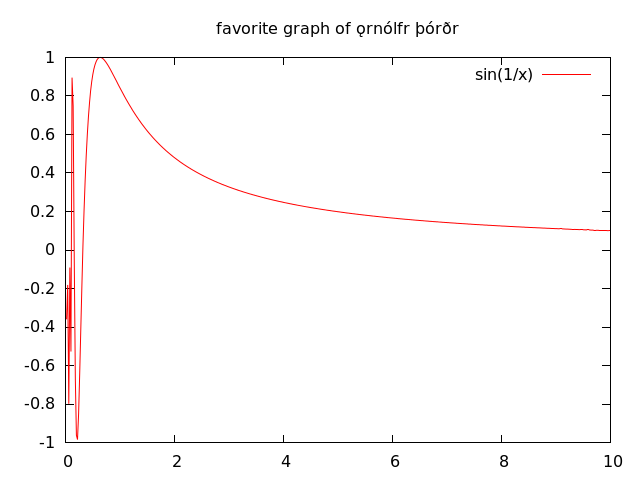

In [31]:
(defun using-unicode-characters-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :samples 500)
    (gp :set :encoding 'utf8)
    (gp :set :title "favorite graph of ǫrnólfr þórðr")
    'font
    "helvetica, 24"
    (func-plot "[0:10] sin(1/x)"))
  output)
(png-from-file
 (using-unicode-characters-plot "images/using-unicode-characters-plot.png"))


#3 Applying Colors and Styles



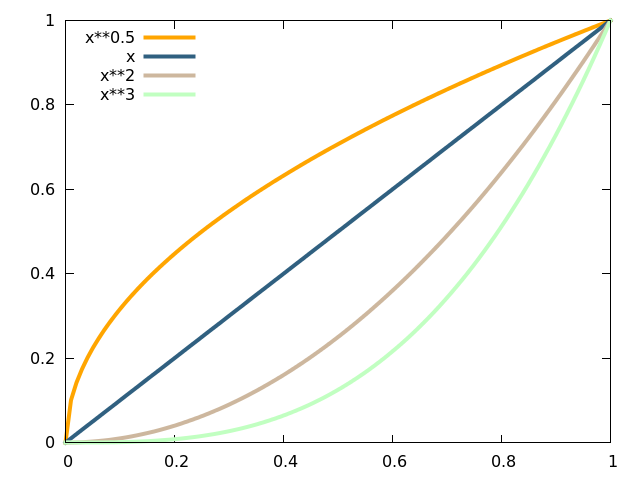

In [32]:
(defun coloring-curves-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo solid lw 4))
    (gp :set :border '(lw 0.25))
    (gp :set :key '(top left))
    (func-plot
     "[0:1] x**0.5 lc rgb 'orange', x lc rgb 'steelblue',x**2 lc rgb 'bisque', x**3 lc rgb 'seagreen'"))
  output)
(png-from-file (coloring-curves-plot "images/coloring-curves-plot.png"))


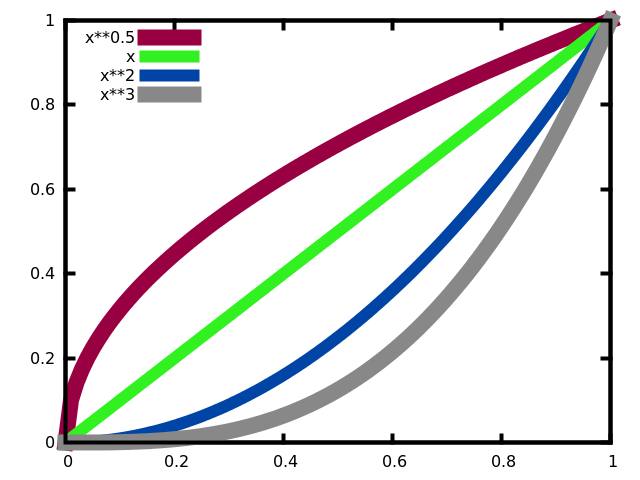

In [33]:
(defun styling-curves-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo solid lw 4))
    (gp :set :key '(top left))
    (gp :set :style '(:line 1 lt 3 lw 4 lc rgb ("'#990042'")))
    (gp :set :style '(:line 2 lt 7 lw 3 lc rgb ("'#31f120'")))
    (gp :set :style '(:line 3 lt 2 lw 3 lc rgb ("'#0044a5'")))
    (gp :set :style '(:line 4 lt 9 lw 4 lc rgb ("'#888888'")))
    (func-plot "[0:1] x**0.5 ls 1, x ls 2, x**2 ls 3, x**3 ls 4"))
  output)
(png-from-file (styling-curves-plot "images/styling-curves-plot.png"))


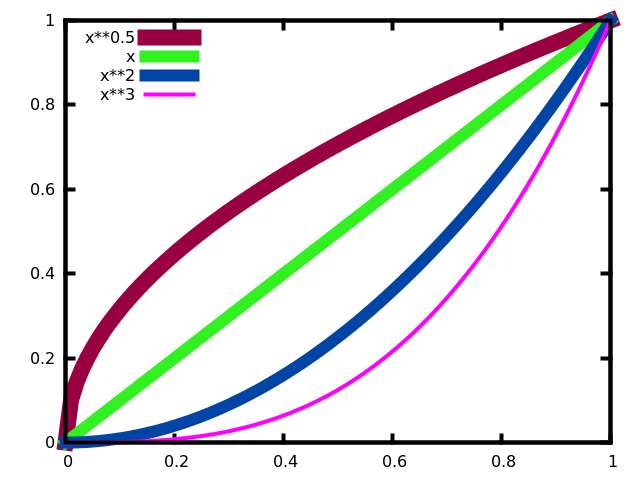

In [34]:
(defun styling-curves--userstyles-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo solid lw 4))
    (gp :set :key '(top left))
    (gp :set :style '(increment userstyles))
    (gp :set :style '(:line 1 lt 3 lw 4 lc rgb ("'#990042'")))
    (gp :set :style '(:line 2 lt 7 lw 3 lc rgb ("'#31f120'")))
    (gp :set :style '(:line 3 lt 2 lw 3 lc rgb ("'#0044a5'")))
    :style
    '(:line 4 lt 9 lw 4 lc rgb ("'#888888'"))
    (func-plot "[0:1] x**0.5, x, x**2, x**3 "))
  output)
(png-from-file
 (styling-curves--userstyles-plot
  "images/styling-curves--userstyles-plot.png"))


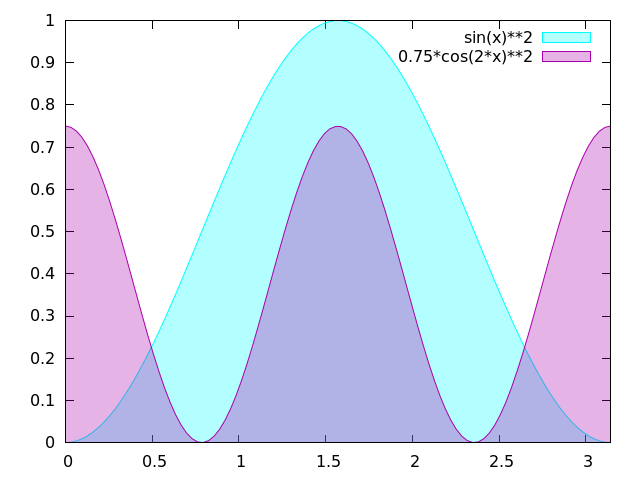

In [35]:
(defun transparency-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :style '(fill transparent solid 0.3))
    (func-plot
     "[0:pi] sin(x)**2 with filledcurves above y1=0 lc rgb '#00ffff', 0.75*cos(2*x)**2 with filledcurves above y1=0 lc rgb '#aa00aa'"))
  output)
(png-from-file (transparency-plot "images/transparency-plot.png"))


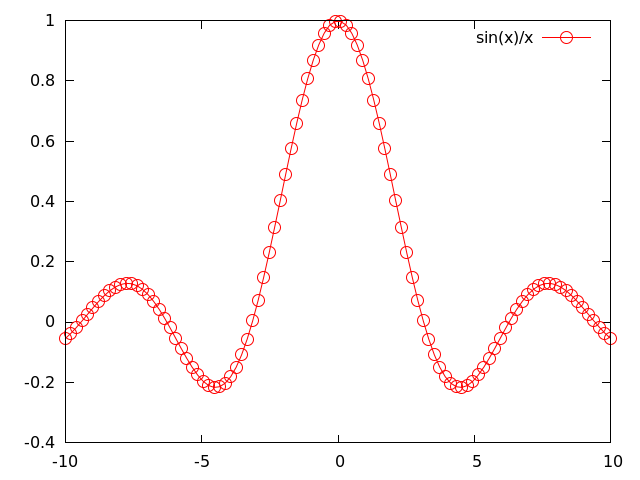

In [36]:
(defun plotting-points-with-curves-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (func-plot "sin(x)/x with linespoints ps 2 pt 6"))
  output)
(png-from-file
 (plotting-points-with-curves-plot
  "images/plotting-points-with-curves-plot.png"))


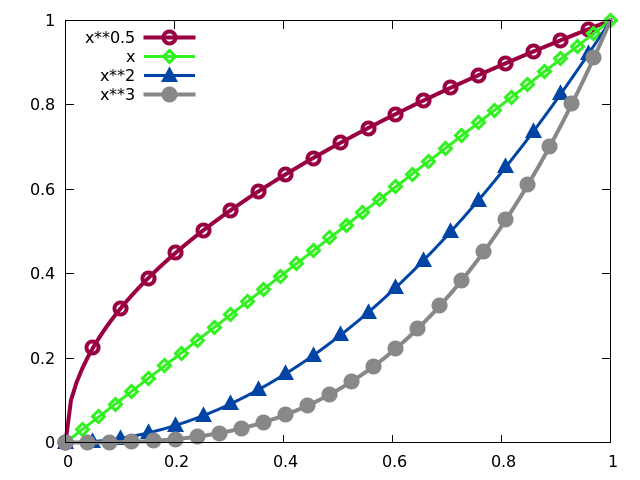

In [37]:
(defun changing-the-point-style-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :key '(top left))
    (gp :set :style '#'linespoints)
    (gp :set :style '(line 1 lw 4 lc rgb ("'#990042'") ps 2 pt 6 pi 5))
    (gp :set :style '(line 2 lw 3 lc rgb ("'#31f120'") ps 2 pt 12 pi 3))
    (gp :set :style '(line 3 lw 3 lc rgb ("'#0044a5'") ps 2 pt 9 pi 5))
    (gp :set :style '(line 4 lw 4 lc rgb ("'#888888'") ps 2 pt 7 pi 4))
    (func-plot "[0:1] x**0.5 ls 1, x ls 2, x**2 ls 3, x**3 ls 4"))
  output)
(png-from-file
 (changing-the-point-style-plot "images/changing-the-point-style-plot.png"))


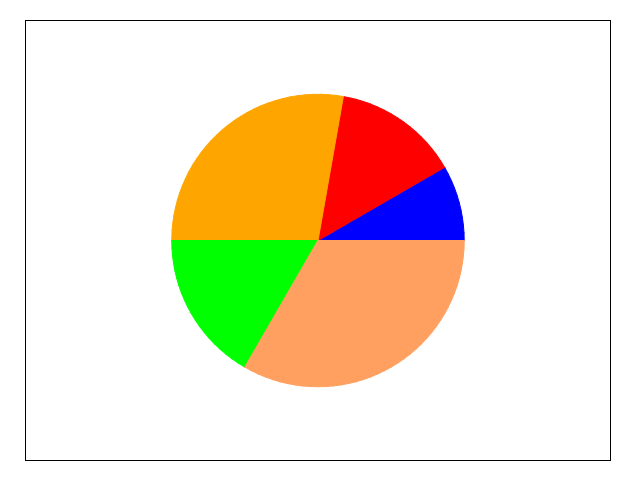

In [38]:
(defun plotting-with-objects-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo) :object
              '(1 circle at graph 0.5 #\, 0.5 size graph 0.25 fillcolor rgb
                ("'blue'") fillstyle solid arc ("[0:30]") front)
              :object
              '(2 circle at graph 0.5 #\, 0.5 size graph 0.25 fillcolor rgb
                ("'red'") fillstyle solid arc ("[30:80]") front)
              :object
              '(3 circle at graph 0.5 #\, 0.5 size graph 0.25 fillcolor rgb
                ("'orange'") fillstyle solid arc ("[80:180]") front)
              :object
              '(4 circle at graph 0.5 #\, 0.5 size graph 0.25 fillcolor rgb
                ("'green'") fillstyle solid arc ("[180:240]") front)
              :object
              '(5 circle at graph 0.5 #\, 0.5 size graph 0.25 fillcolor rgb
                ("'sandybrown'") fillstyle solid arc ("[240:360]") front))
    (gp :unset :key)
    (gp :unset :tics)
    (func-plot "[0:1][0:1] -1"))
  output)
(png-from-file
 (plotting-with-objects-plot "images/plotting-with-objects-plot.png"))


# 4 Controlling Your Tics



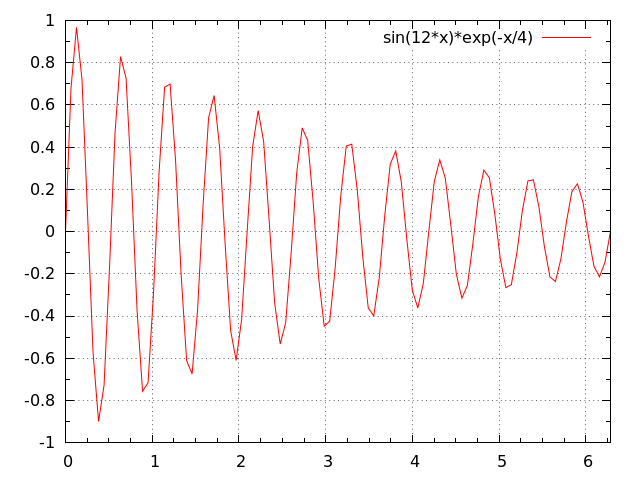

In [39]:
(defun adding-minor-tics-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :grid 'nil)
    (gp :set :mxtics 4)
    (gp :set :mytics 2)
    (func-plot "[0:2*pi] sin(12*x)*exp(-x/4)"))
  output)
(png-from-file (adding-minor-tics-plot "images/adding-minor-tics-plot.png"))


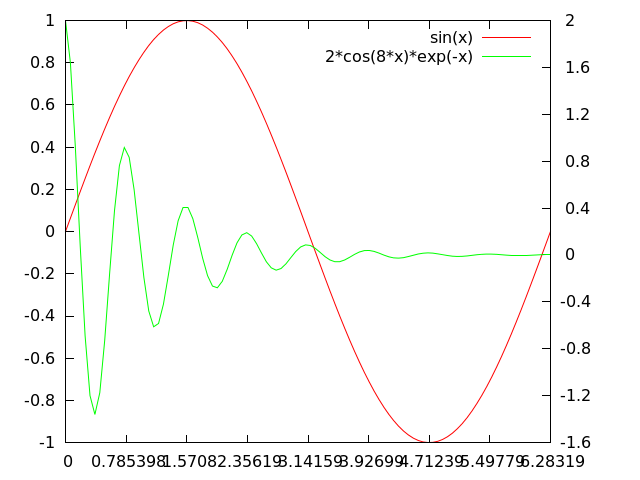

In [40]:
(defun placing-tics-on-second-y-axis-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output
                           :terminal '(pngcairo)) ;
    (gp :set :ytics 'nomirror)
    (gp :set :y2tics 0.4)
    (gp :set :xtics '("pi/4."))
    (func-plot "[0:2*pi] sin(x) axis x1y1, 2*cos(8*x)*exp(-x) axis x1y2"))
  output)
(png-from-file
 (placing-tics-on-second-y-axis-plot
  "images/placing-tics-on-second-y-axis-plot.png"))


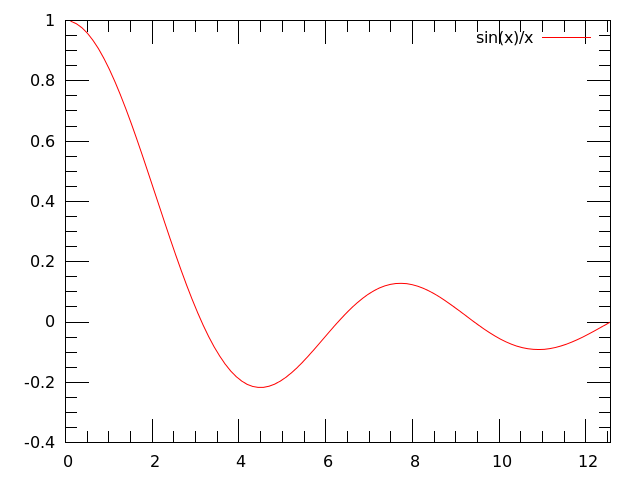

In [41]:
(defun adjusting-the-tic-size-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output
              :terminal '(pngcairo)) ;
    (gp :set :tics '(scale 3))
    (gp :set :mxtics 4)
    (gp :set :mytics 4)
    (func-plot "[0:4*pi] sin(x)/x"))
  output)

(png-from-file
 (adjusting-the-tic-size-plot "images/adjusting-the-tic-size-plot.png"))


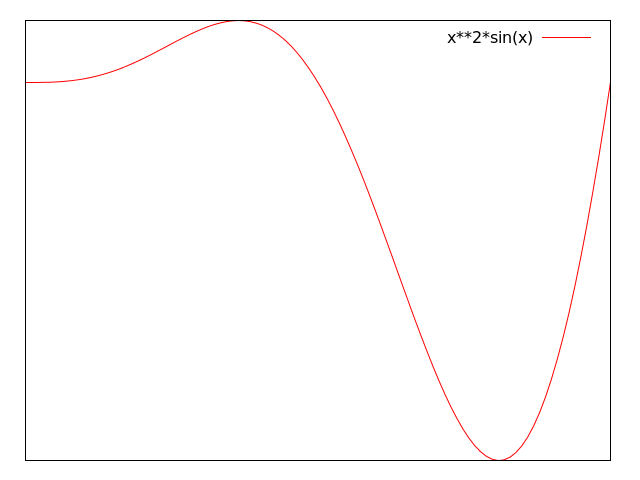

In [42]:
(defun removing-all-tics-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :tics)
    (func-plot "[0:2*pi] x**2*sin(x)"))
  output)
(png-from-file (removing-all-tics-plot "images/removing-all-tics-plot.png"))


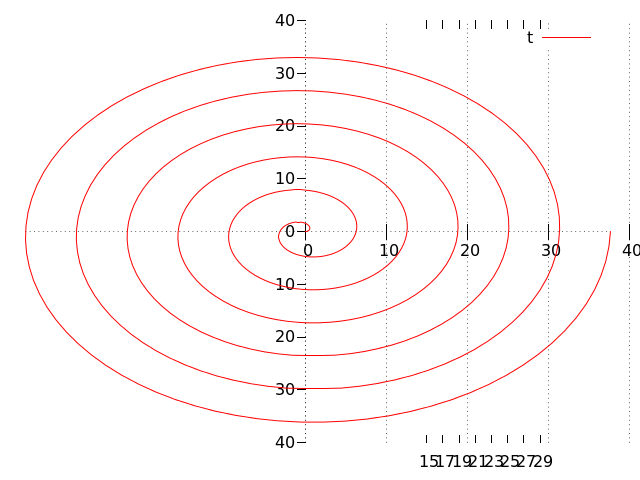

In [43]:
(defun defining-tic-values-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output
                           :terminal '(pngcairo)) ;
    (gp :unset :border)
    (gp :set :xtics) '(axis nomirror)
    (gp :set :ytics '(axis nomirror))
    (gp :set :zeroaxis)
    (gp :set :polar)
    (gp :set :samples 500) 
    (gp :set :grid)
    (gp :unset :raxis)
    (gp :set :xtics '(15 #\, 2 #\, 30))
    (gp :set :ytics) '(10 #\, 2 #\, 20)
    (func-plot "[0:12*pi] t"))
  output)

(png-from-file
 (defining-tic-values-plot "images/defining-tic-values-plot.png"))


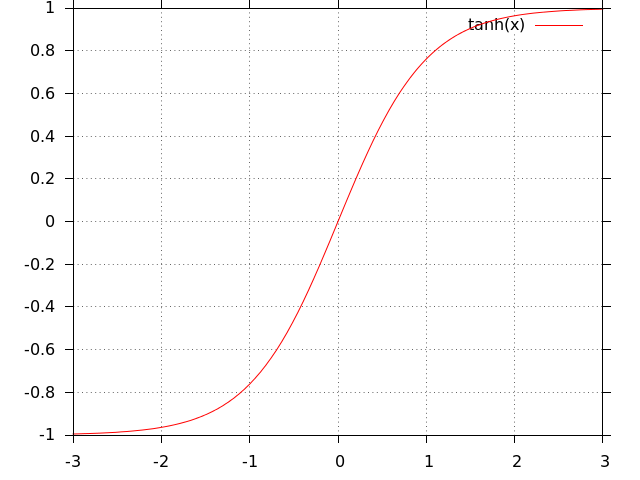

In [44]:
(defun making-the-tics-stick-out-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :tics 'out)
    (gp :set :grid 'nil)
    (func-plot "[-3:3] tanh(x)"))
  output)
(png-from-file
 (making-the-tics-stick-out-plot "images/making-the-tics-stick-out-plot.png"))


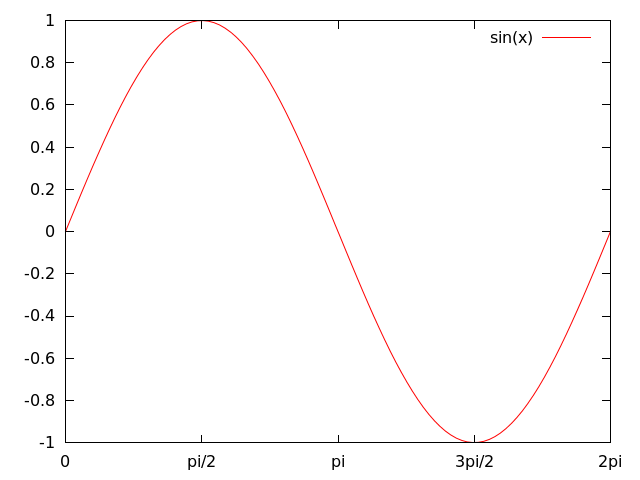

In [45]:
(defun setting-manual-tics-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :xtics
        '(#\( "pi" pi #\, "pi/2" pi/2 #\, "2pi" 2*pi #\, "3pi/2" 3*pi/2 #\, "0"
          0 #\)))
    (func-plot "[0:2*pi] sin(x)"))
  output)
(png-from-file
 (setting-manual-tics-plot "images/setting-manual-tics-plot.png"))


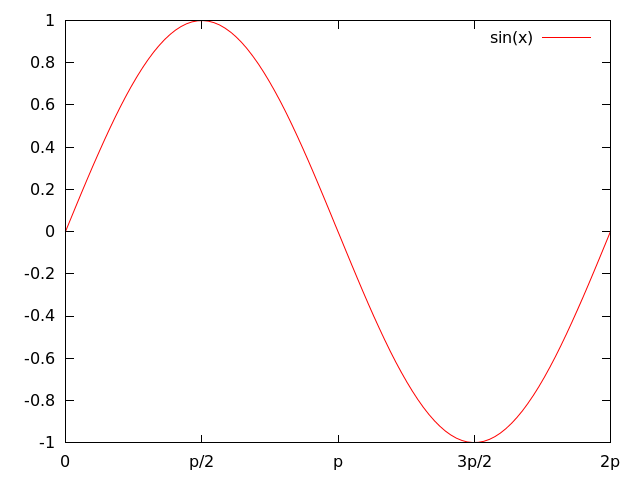

In [46]:
(defun setting-manual-tics-enhanced-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo enhanced))
    (gp :set :xtics
        '(#\( "{/symbol p}" pi #\, "{/symbol p}/2" pi/2 #\, "2{/symbol p}" 2*pi
          #\, "3{/symbol p}/2" 3*pi/2 #\, "0" 0 #\)))
    (func-plot "[0:2*pi] sin(x)"))
  output)
(png-from-file
 (setting-manual-tics-enhanced-plot
  "images/setting-manual-tics-enhanced-plot.png")
)


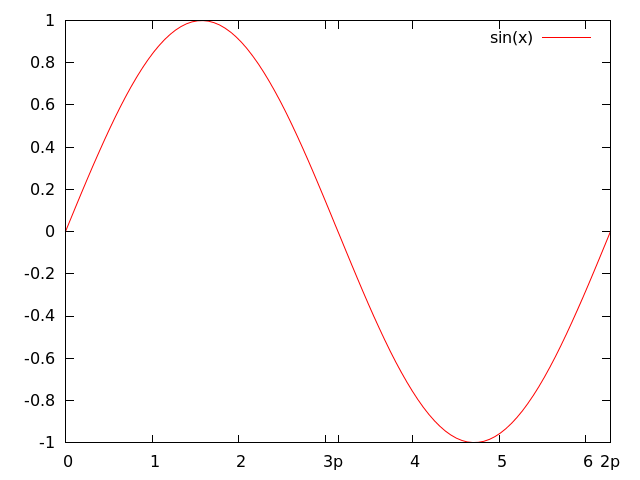

In [47]:
(defun setting-manual-tics-enhanced-add-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo enhanced))
    (gp :set :xtics '(add #\( "{/symbol p}" pi #\, "2{/symbol p}" 2*pi #\)))
    (func-plot "[0:2*pi] sin(x)"))
  output)
(png-from-file
 (setting-manual-tics-enhanced-add-plot
  "images/setting-manual-tics-enhanced-add-plot.png"))


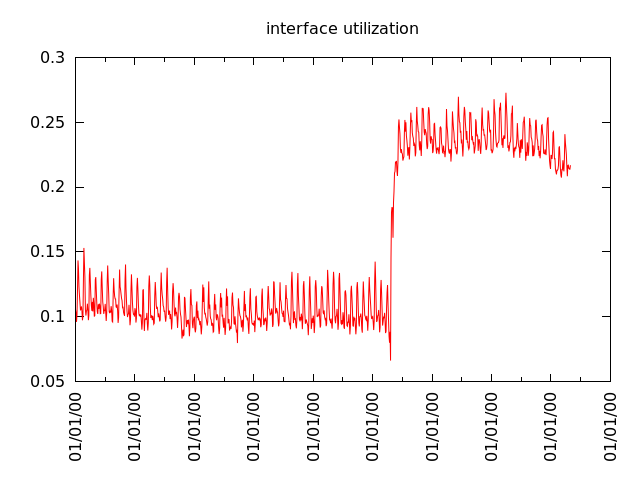

In [48]:
(defun plotting-with-dates-and-times-plot (output)
  (let ((s
         (clml.utility.data:fetch
          "https://mmaul.github.io/clml.data/sample/traffic-balance.csv"
          :stream t)))
    (with-plots (*standard-output* :debug nil)
      (gp-setup :terminal '(pngcairo) :output output)
      (gp :set :title "interface utilization")
      (gp :set :xdata 'time)
      (gp :set :timefmt "%y/%m/%d:%h:%m:%s")
      (gp :set :format '(x "%d/%m/%y"))
      (gp :set :xtics '(rotate))
      (gp :unset :key)
      (plot
       (lambda ()
         (loop for row across (subseq
                               (clml.utility.csv:read-csv-stream s :type-spec
                                                                 '(string float
                                                                          float
                                                                          float
                                                                          float
                                                                          float
                                                                          float))
                               0 1000)
               do (format t "~&~a ~{~a~^ ~}"
                          (map 'string
                               (lambda (x)
                                 (if (equal #\  x)
                                     #\:
                                     x))
                               (elt row 0))
                          (coerce (subseq row 1) 'list))))
       :using '(0 5) :with 'lines)))
  output)
(png-from-file
 (plotting-with-dates-and-times-plot
  "images/plotting-with-dates-and-times-plot.png"))


The plot below requires gnuplot version 5



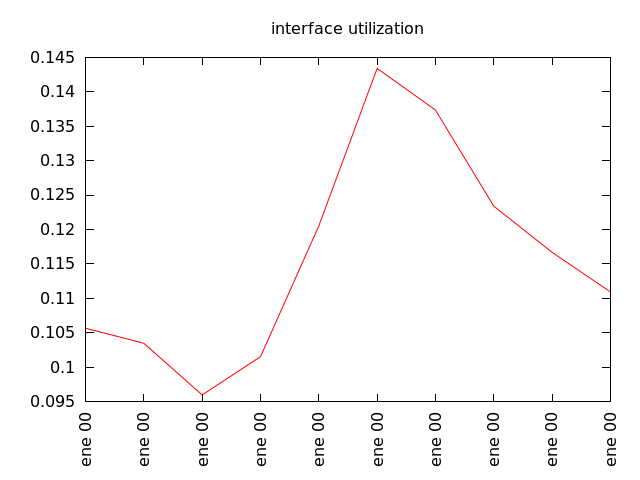

In [49]:
(defun changing-language-used-in-labels-plot (output)
  (let ((s
         (clml.utility.data:fetch
          "https://mmaul.github.io/clml.data/sample/traffic-balance.csv"
          :stream t)))
    (with-plots (*standard-output* :debug nil)
      (gp-setup :terminal '(pngcairo) :output output)
      (gp :set :title "interface utilization")
      (gp :set :xdata 'time)
      (gp :set :locale "es_ES.utf8")
      (gp :set :timefmt "%y/%m/%d:%h:%m:%s")
      (gp :set :format '(x "%b %y"))
      (gp :set :xtics '(rotate))
      (gp :unset :key)
      (plot
       (lambda ()
         (loop for row across (subseq
                               (clml.utility.csv:read-csv-stream s :type-spec
                                                                 '(string float
                                                                          float
                                                                          float
                                                                          float
                                                                          float
                                                                          float))
                               0 10)
               do (format t "~&~a ~{~a~^ ~}"
                          (map 'string
                               (lambda (x)
                                 (if (equal #\  x)
                                     #\:
                                     x))
                               (elt row 0))
                          (coerce (subseq row 1) 'list))))
       :using '(0 5) :with 'lines)))
  output)
(png-from-file
 (changing-language-used-in-labels-plot
  "images/changing-language-used-in-labels-plot.png"))


The plot below requires gnuplot version 5



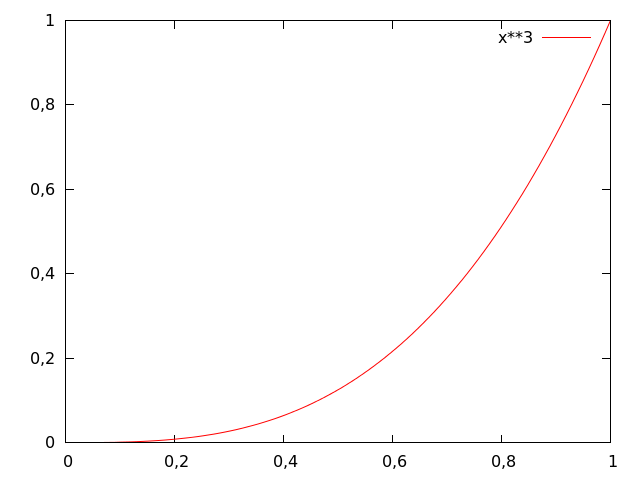

In [50]:
(defun using-european-style-decimals-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :decimalsign '(locale "es_ES.utf8"))
    (func-plot "[0:1] x**3"))
  output)
(png-from-file
 (using-european-style-decimals-plot
  "images/using-european-style-decimals-plot.png"))


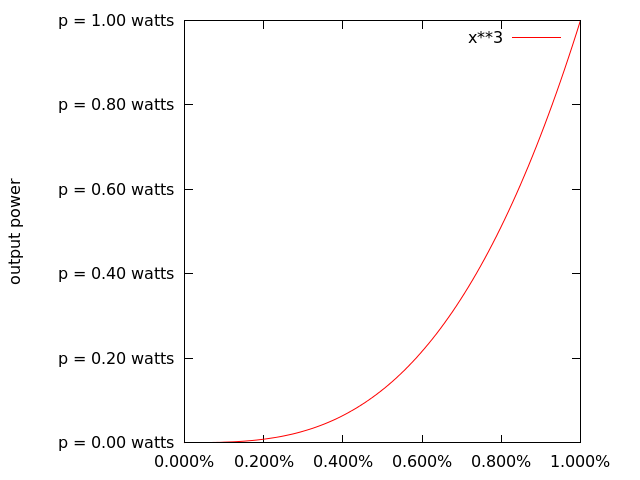

In [51]:
(defun formatting-tic-labels-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :ylabel "output power")
    (gp :set :format '(y "p = %.2f watts"))
    (gp :set :format '(x "%.3f%%"))
    (gp :set :rmargin 6)
    (func-plot "[0:1] x**3"))
  output)
(png-from-file
 (formatting-tic-labels-plot "images/formatting-tic-labels-plot.png"))


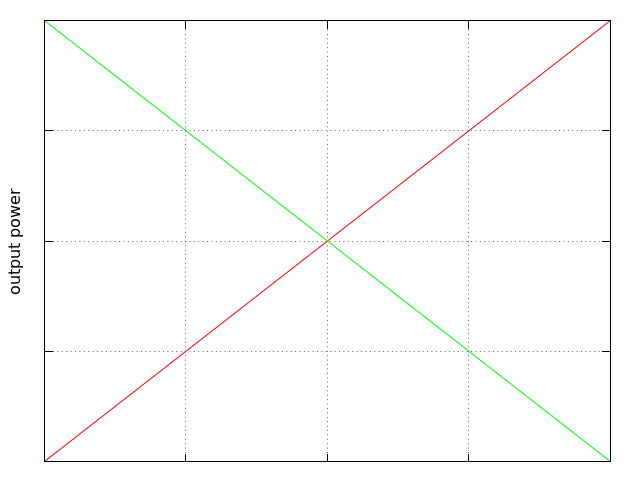

In [52]:
(defun tic-no-labels-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo enhanced))
    (gp :set :ylabel "output power")
    (gp :set :format '(y ""))
    (gp :set :format '(x ""))
    (gp :set :grid)
    (gp :unset :key)
    (func-plot "x, -x"))
  output)
(png-from-file (tic-no-labels-plot "images/tic-no-labels-plot.png"))


#5 Combining Multiple Plots



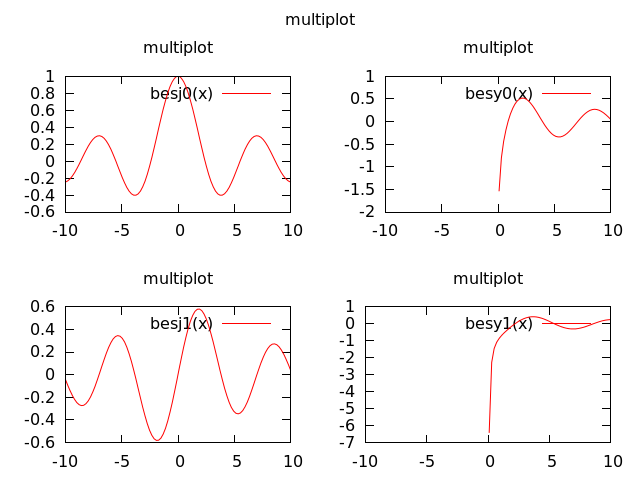

In [53]:
(defun multiplot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "multiplot"
              :multiplot (list "layout 2,2 columnsfirst title \"multiplot\""))
    (func-plot "besj0(x)")
    (func-plot "besj1(x)")
    (func-plot "besy0(x)")
    (func-plot "besy1(x)")
    (gp :unset 'multiplot))
  output)
(png-from-file (multiplot "images/multiplot.png"))


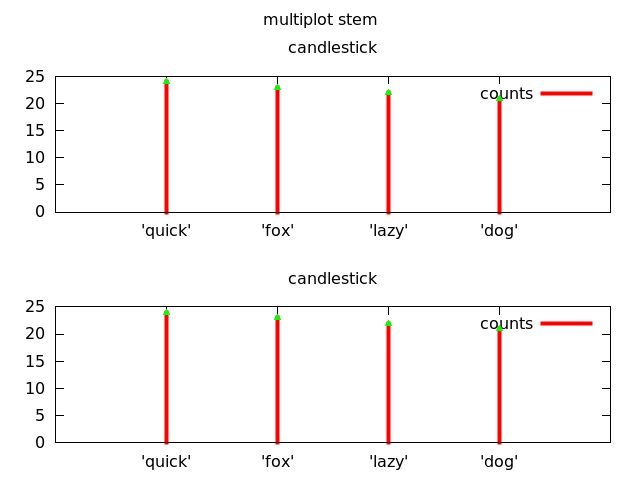

In [54]:
(defun stem-multiplot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "candlestick"
              :xrange (list "[0:5]") :yrange (list "[0:25]") :multiplot
              (list "layout 2,1 columnsfirst title \"multiplot stem\""))
    (plot
     (lambda ()
       (loop for r in '((1 5 7 10 15 24 0.3 "'quick'")
                        (2 6 8 11 16 23 0.4 "'fox'")
                        (3 5 7 11 17 22 0.5 "'lazy'")
                        (4 6 9 10 18 21 0.3 "'dog'"))
             do (format t "~&~{~^~a ~}" r)))
     :using '(1 6 "xticlabels(8)") :with '(impulses lw 4 title "counts") :using
     '(1 6) :with '(points pt 9 notitle))
    (plot
     (lambda ()
       (loop for r in '((1 5 7 10 15 24 0.3 "'quick'")
                        (2 6 8 11 16 23 0.4 "'fox'")
                        (3 5 7 11 17 22 0.5 "'lazy'")
                        (4 6 9 10 18 21 0.3 "'dog'"))
             do (format t "~&~{~^~a ~}" r)))
     :using '(1 6 "xticlabels(8)") :with '(impulses lw 4 title "counts") :using
     '(1 6) :with '(points pt 9 notitle))
    (gp :unset 'multiplot))
  output)
(png-from-file (stem-multiplot "images/stem-multiplot.png"))


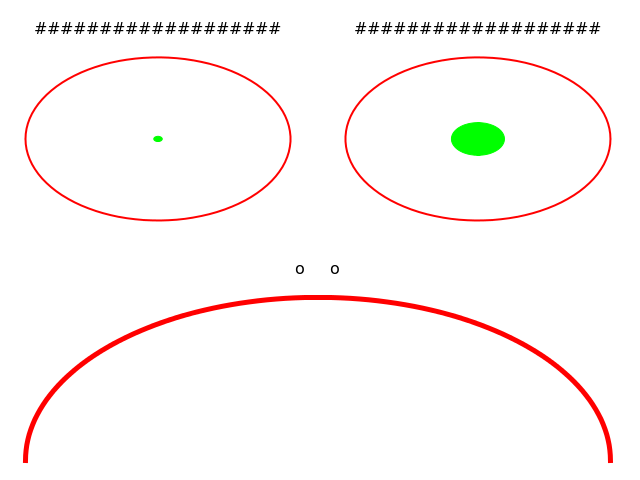

In [55]:
(defun plot-positioning-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :multiplot (list ""))
    (gp :set :title "o     o")
    (gp :set :polar 'nil)
    (gp :set :size (list "1,.5"))
    (gp :set :border 0)
    (gp :unset :key)
    (gp :unset :tics)
    (gp :unset :raxis)
    (func-plot "[pi:2*pi] -1" :lw 5)
    (gp :set :title "###################")
    (gp :set :origin (list "0,.5"))
    (gp :set :size (list ".5, .5"))
    (func-plot "-2*pi" :lw (list "2, .2") :with 'filledcurves)
    (gp :set :origin (list ".5, .5"))
    (gp :set :title "###################")
    (func-plot "1" :lw (list "2, .2") :with 'filledcurves)
    (gp :unset 'multiplot))
  output)
(png-from-file (plot-positioning-plot "images/plot-positioning.png"))


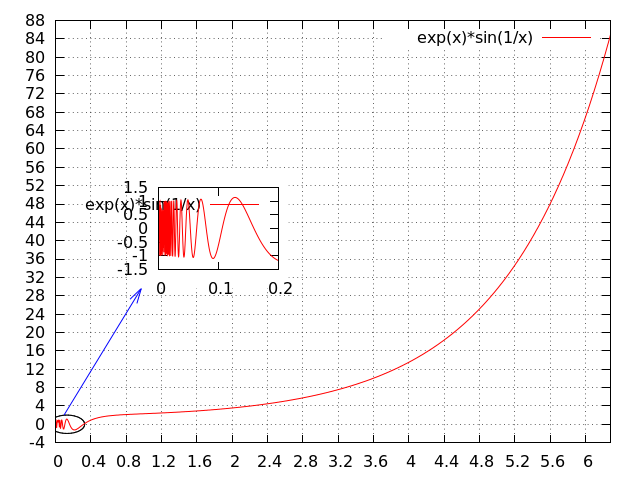

In [56]:
(defun inset-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :multiplot (list ""))
    (gp :set :object '(ellipse center 0.13 #\, 0 size 0.4 #\, 4))
    (gp :set :arrow '(from 0.1 #\, 2.1 to screen 0.22 #\, 0.4 front lt 3))
    (gp :set :samples 1000)
    (gp :set :grid 'nil)
    (gp :set :xtics 0.4)
    (gp :set :ytics 4)
    (func-plot "[0:2*pi] exp(x)*sin(1/x)")
    (gp :set :origin '(0.2 #\, 0.4))
    (gp :set :size '(0.25 #\, 0.25))
    (gp :clear)
    (gp :unset :grid)
    (gp :unset :object)
    (gp :unset :arrow)
    (gp :set :xtics 0.1)
    (gp :set :ytics 0.5)
    (gp :set :bmargin 1)
    (gp :set :tmargin 1)
    (gp :set :lmargin 3)
    (gp :set :rmargin 1)
    (func-plot "[0:.2] exp(x)*sin(1/x)")
    (gp :unset 'multiplot))
  output)
(png-from-file (inset-plot "images/inset-plot.png"))


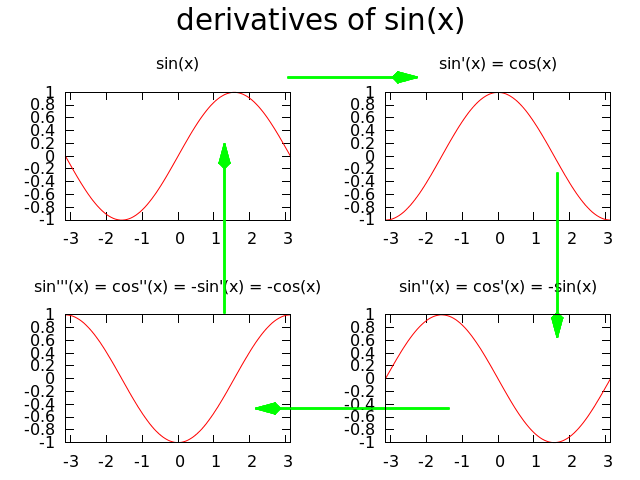

In [57]:
(defun multiplot-w-labels-and-arrows (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo) :multiplot
              '(layout 2 #\, 2 title "derivatives of sin(x)" font
                "times-roman, 22"))
    (gp :unset :key)
    (gp :set :xrange '("[-pi:pi]"))
    (gp :set :arrow '(from 0.1 #\, 2.1 to screen 0.22 #\, 0.4 front lt 3))
    (gp :set :style
        '(arrow 1 head filled size screen 0.03 #\, 15 #\, 135 lt 2 lw 2))
    (gp :set :arrow
        '(1 from screen 0.45 #\, 0.84 to screen 0.65 #\, 0.84 arrowstyle 1))
    (gp :set :arrow
        '(2 from screen 0.87 #\, 0.64 to screen 0.87 #\, 0.3 arrowstyle 1))
    (gp :set :arrow
        '(3 from screen 0.7 #\, 0.15 to screen 0.4 #\, 0.15 arrowstyle 1))
    (gp :set :arrow
        '(4 from screen 0.35 #\, 0.35 to screen 0.35 #\, 0.7 arrowstyle 1))
    (gp :set :title "sin(x)")
    (func-plot "sin(x)")
    (gp :set :title "sin'(x) = cos(x)")
    (func-plot "cos(x)")
    (gp :set :title "sin'''(x) = cos''(x) = -sin'(x) = -cos(x)")
    (func-plot "-cos(x)")
    (gp :set :title "sin''(x) = cos'(x) = -sin(x)")
    (func-plot "-sin(x)")
    (gp :unset 'multiplot))
  output)
(png-from-file
 (multiplot-w-labels-and-arrows "images/multiplot-w-labels-and-arrows.png"))


#7 Proramming gnuplot and dealing with data



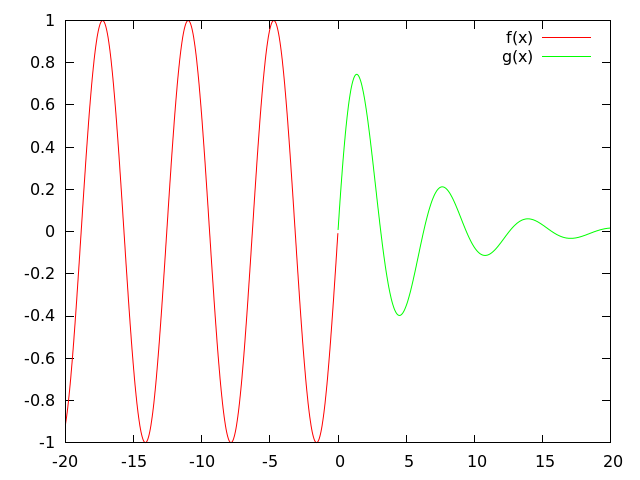

In [58]:
(defun plotting-on-sub-intervals-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :terminal '(pngcairo) :output output)
    (gp :set :samples 2000)
    (gp "f(x) = x < 0 ? sin(x) : NaN")
    (gp "g(x) = x >= 0 ? exp(-x/5.)*sin(x) : NaN")
    (func-plot "[-20 : 20] f(x), g(x)")
    )
  output)
(png-from-file
 (plotting-on-sub-intervals-plot "images/plotting-on-sub-intervals-plot.png"))


Not working needs to repeat data section again for smoothing, but look for fix in the future



In [59]:
(defun smoothing-your-data-plot (output)
  (let ((s
         (clml.utility.data:fetch
          "http://www.google.com/finance/getprices?i=60&p=10d&f=d,o,h,l,c,v&df=cpct&q=ibm"
          :stream t)))
    (clml.utility.data:process-finance-header s)
    (with-plots (*standard-output* :debug nil)
      (gp-setup :terminal '(pngcairo) :output output)
      (plot
       (lambda ()
         (loop for row across (subseq
                               (clml.utility.csv:read-csv-stream s :type-spec
                                                                 '(float float
                                                                         float
                                                                         float
                                                                         float
                                                                         float))
                               0 300)
               do (format t "~&~{~a~^ ~}" (coerce row 'list))))
       :using '(0 4) :with
       '(lines lw 0.5 notitle #\, ("''") smooth bezier lw 4 title
         "bezier smoothed"))))
  output)
;(png-from-file
; (smoothing-your-data-plot "images/smoothing-your-data-plot.png"))


SMOOTHING-YOUR-DATA-PLOT

Not working needs to repeat data section again for smoothing, but look for fix in the future



In [60]:
(defun fit-functions-to-your-data-plot (output)
  (let ((s
         (clml.utility.data:fetch
          "http://www.google.com/finance/getprices?i=60&p=10d&f=d,o,h,l,c,v&df=cpct&q=ibm"
          :stream t)))
    (clml.utility.data:process-finance-header s)
    (with-plots (*standard-output* :debug nil)
      (gp-setup :terminal '(pngcairo) :output output)
      (format t "~&f(x) = a*sin(b*x)~%")
      (format t "~&fit f(x) 'rs.dat' via a, b~%")
      (plot
       (lambda ()
         (loop for row across (subseq
                               (clml.utility.csv:read-csv-stream s :type-spec
                                                                 '(float float
                                                                         float
                                                                         float
                                                                         float
                                                                         float))
                               0 300)
               do (format t "~&~{~a~^ ~}" (coerce row 'list))))
       :using '(0 4) :with
       '(lines lw 0.5 notitle #\, f (x) lw 4 title " fit by gnuplot"))))
  output)
;(png-from-file
; (fit-functions-to-your-data-plot
;  "images/fit-functions-to-your-data-plot.png"))


FIT-FUNCTIONS-TO-YOUR-DATA-PLOT

Not working needs to repeat data section again for smoothing, but look for fix in the future



In [61]:
(defun using-kdensity-to-improve-on-histograms-plot (output)
  (let ((s
         (clml.utility.data:fetch
          "http://www.google.com/finance/getprices?i=60&p=10d&f=d,o,h,l,c,v&df=cpct&q=ibm"
          :stream t)))
    (clml.utility.data:process-finance-header s)
    (with-plots (*standard-output* :debug nil)
      (gp-setup :terminal '(pngcairo) :output output)
      (format t "~&f(x) = a*sin(b*x)~%")
      (format t "~&fit f(x) 'rs.dat' via a, b~%")
      (plot
       (lambda ()
         (loop for row across (subseq
                               (clml.utility.csv:read-csv-stream s :type-spec
                                                                 '(float float
                                                                         float
                                                                         float
                                                                         float
                                                                         float))
                               0 300)
               do (format t "~&~{~a~^ ~}" (coerce row 'list))))
       :using '(("1:(.001)") smooth kdensity))))
  output)
;(png-from-file
; (using-kdensity-to-improve-on-histograms-plot
;  "images/using-kdensity-to-improve-on-histograms-plot.png"))


USING-KDENSITY-TO-IMPROVE-ON-HISTOGRAMS-PLOT

#8 Third dimension



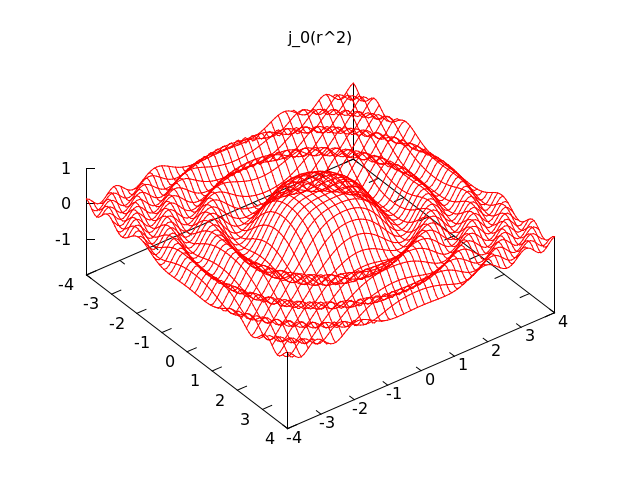

In [62]:
(defun 3d-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :isosamples 40)
    (gp :set :title "j_0(r^2)")
    (gp :set :xrange '("[-4:4]"))
    (gp :set :yrange '("[-4:4]"))
    (gp :set :ztics 1)
    (gp :set :view '(29 #\, 53))
    (func-splot "besj0(x**2+y**2)")
    (format t "~&replot~%"))
  output)
(png-from-file (3d-plot "images/3d-plot.png"))


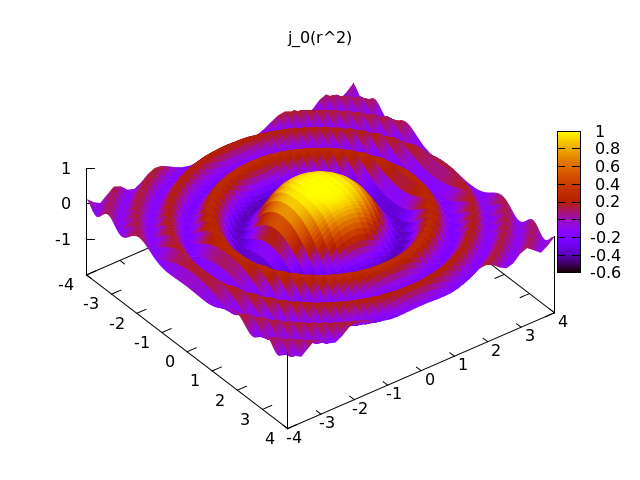

In [63]:
(defun pm3d-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :isosamples 40)
    (gp :set :title "j_0(r^2)")
    (gp :set :xrange '("[-4:4]"))
    (gp :set :yrange '("[-4:4]"))
    (gp :set :ztics 1)
    (gp :set :view '(29 #\, 53))
    (gp :set :pm3d 'nil)
    (gp :unset :surface)
    (func-splot "besj0(x**2+y**2)")
    (format t "~&replot~%"))
  output)
(png-from-file (pm3d-plot "images/pm3d-plot.png"))


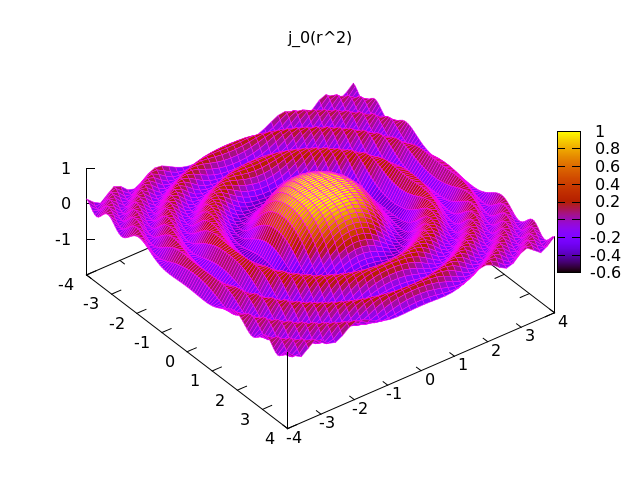

In [64]:
(defun pm3d2-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :isosamples 40)
    (gp :set :title "j_0(r^2)")
    (gp :set :xrange '("[-4:4]"))
    (gp :set :yrange '("[-4:4]"))
    (gp :set :ztics 1)
    (gp :unset :surf)
    (gp :set :view '(29 #\, 53))
    (gp :set :style '(line 1 lt 4 lw 0.5))
    (gp :set :pm3d '(at s hidden3d 1))
    (func-splot "besj0(x**2+y**2)")
    (format t "~&replot~%"))
  output)
(png-from-file (pm3d2-plot "images/pm3d2-plot.png"))


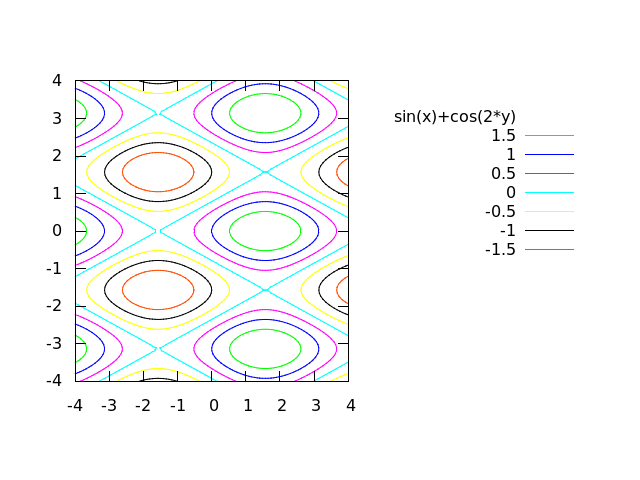

In [65]:
(defun contour-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :cntrparam '(levels 10))
    (gp :set :contour 'base)
    (gp :unset :sur)
    (gp :set :view 'map)
    (gp :set :xrange '("[-4:4]"))
    (gp :set :yrange '("[-4:4]"))
    (gp :set :iso 100)
    (gp :set :samp 100)
    (gp :set :key 'rmargin)
    (func-splot "sin(x)+cos(2*y)"))
  output)
(png-from-file (contour-plot "images/contour-plot.png"))


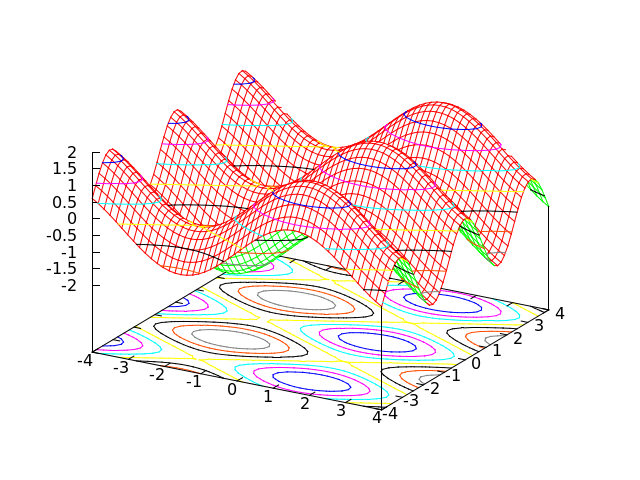

In [66]:
(defun contour-both (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :cntrparam '(levels 10))
    (gp :set :style '(line 1 linecolor rgb "'#cccccc'"))
    (gp :set :contour 'both)
    (gp :set :hidd 'nil)
    (gp :set :iso 50)
    (gp :set :samp 50)
    (gp :set :yrange '("[-4:4]"))
    (gp :set :xrange '("[-4:4]"))
    (func-splot "sin(x)+cos(2*y)" :with '(lines linestyle 1)))
  output)
(png-from-file (contour-both "images/contour-both.png"))


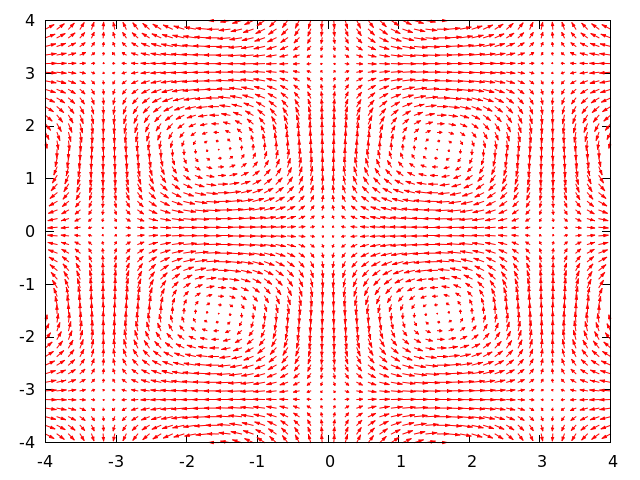

In [67]:
(defun vector-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :xrange '("[0:pi]"))
    (gp :set :yrange '("[0:pi]"))
    (gp :set :iso 20)
    (gp :set :samp 20)
    (gp :a := .2)
    (gp :set :iso 50)
    (gp :set :samp 50)
    (gp :set :yrange '("[-4:4]"))
    (gp :set :xrange '("[-4:4]"))
    (func-plot "'++'" :using '(1 2 "(-a*sin($1)*cos($2)):(a*cos($1)*sin($2))")
               :with '(vec size 0.06 #\, 15 filled)))
  output)
(png-from-file (vector-plot "images/vector-plot.png"))


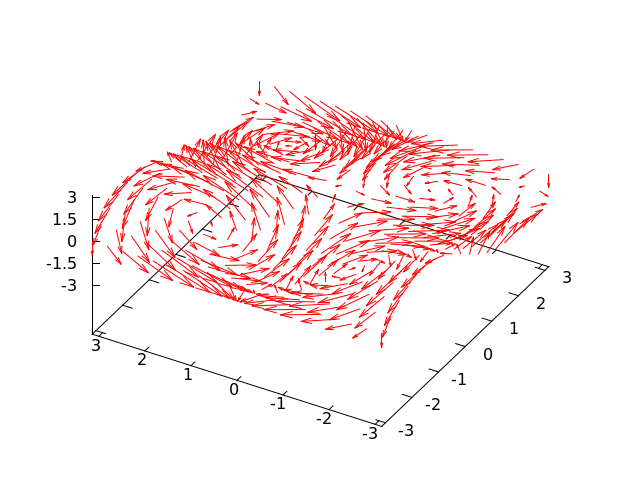

In [68]:
(defun vector-contour-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :xrange '("[-pi:pi]"))
    (gp :set :yrange '("[-pi:pi]"))
    (gp :set :zrange '("[-pi:pi]"))
    (gp :set :iso 20)
    (gp :set :samp 20)
    (gp :set :ztics 1.5)
    (gp :set :view '(37 #\, 300))
    (gp :a := .9)
    (func-splot "'++'" :using
                (list 1 2 "(2*a*cos($2)*sin($1))" "(-a*sin($1)*cos($2))"
                      "(a*cos($1)*sin($2))" "(a*cos($1))")
                :with '(vec)))
  output)
(png-from-file (vector-contour-plot "images/vector-contour-plot.png"))


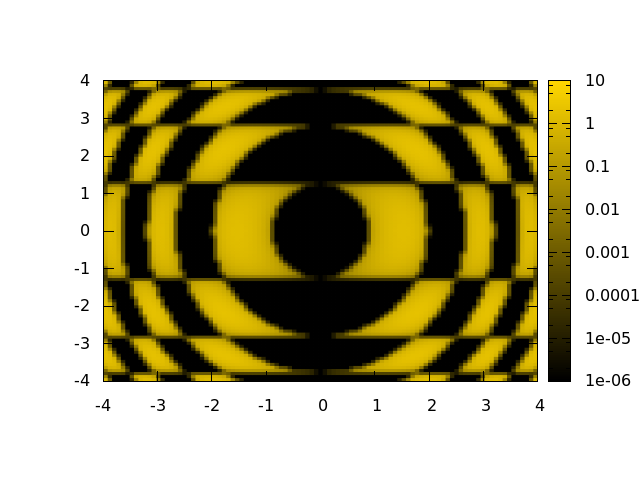

In [69]:
(defun image-map-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :xrange '("[-4:4]"))
    (gp :set :yrange '("[-4:4]"))
    (gp :set :iso 100)
    (gp :set :samp 100)
    (gp :set :view 'map)
    (gp :set :pm3d '(at b))
    (gp :set :palette '("defined (0 'black', 1 'gold')"))
    (gp :set :logscale 'cb)
    (gp :unset :surface)
    (func-splot "sin(y**2+x**2) - cos(x**2)"))
  output)
(png-from-file (image-map-plot "images/image-map-plot.png"))


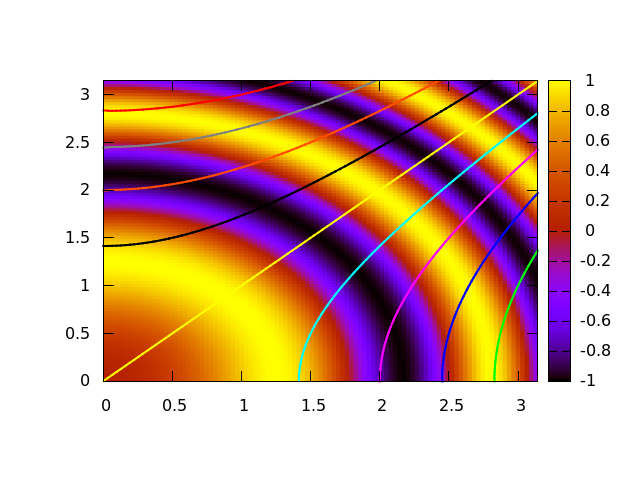

In [70]:
(defun contours-image-map-plot(output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output
                           :terminal '(pngcairo))
    (gp :unset :key)
    (gp :unset :surface)
    (gp :set :xrange '("[0:pi]"))
    (gp :set :yrange '("[0:pi]"))
    (gp :set :iso 100)
    (gp :set :samp 100)
    (gp :set :cntrparam '(levels 10))
    (gp :set :view 'map)
    (gp :set :pm3d '(at b))
    (gp :set :contour 'base)
     ;:palette '("defined (0 'black', 1 'gold')")
     ;:logscale 'cb
     ;:cbrange "[a : b]"
     
    ;(gp :unset :surface )
    (func-splot "'++'"
                :using '(1 2 "($1**2-$2**2)" "(sin($1**2+$2**2))")
                :with '( lines lw 2)))
  output)
(png-from-file (contours-image-map-plot "images/contours-image-map-plot.png"))


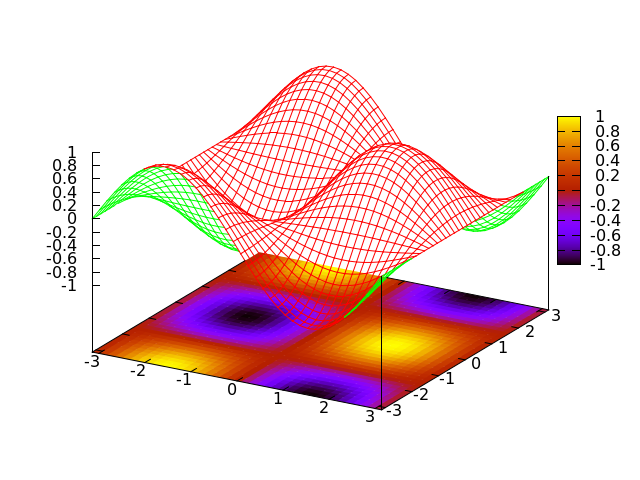

In [71]:
(defun surface-w-images-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :xrange '("[-pi:pi]"))
    (gp :set :yrange '("[-pi:pi]"))
    (gp :set :iso 40)
    (gp :set :samp 40)
    (gp :set :hidden 'front)
    (format t "~&f(x,y) = sin(x)*cos(y)~%")
    (func-splot "f(x,y)" :with (list "pm3d at b, f(x,y)") :with 'lines))
  output)
(png-from-file (surface-w-images-plot "images/surface-w-images-plot.png"))


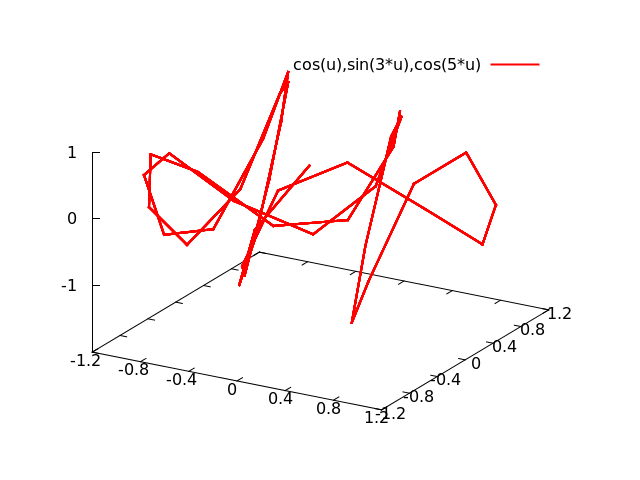

In [72]:
(defun path-in-3d-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :xtics 0.4)
    (gp :set :ytics 0.4)
    (gp :set :parametric 'nil)
    (gp :set :samp 40)
    (gp :set :ztics 1)
    (func-splot "cos(u),sin(3*u),cos(5*u) lw 2"))
  output)
(png-from-file (path-in-3d-plot "images/path-in-3d-plot.png"))


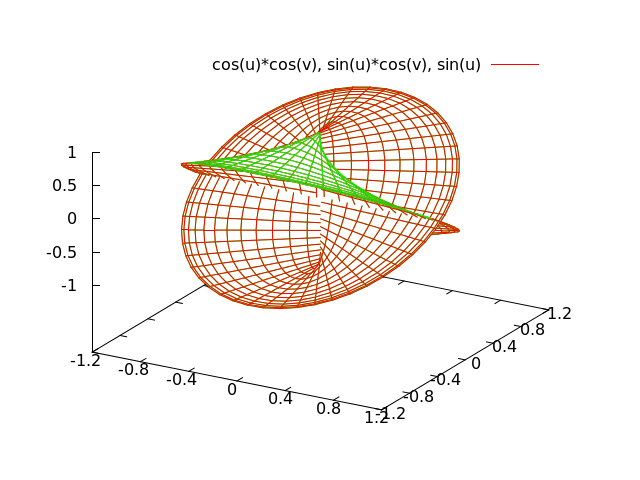

In [73]:
(defun parametric-surfaces (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :param 'nil)
    (gp :set :iso 50)
    (gp :set :ztics 0.5)
    (gp :set :xtics 0.4)
    (gp :set :ytics 0.4)
    (gp :set :urange '("[-pi:pi]"))
    (gp :set :vrange '("[-pi:pi]"))
    (gp :set :hidd 'nil)
    (func-splot "cos(u)*cos(v), sin(u)*cos(v), sin(u)"))
  output)
(png-from-file (parametric-surfaces "images/parametric-surfaces.png"))


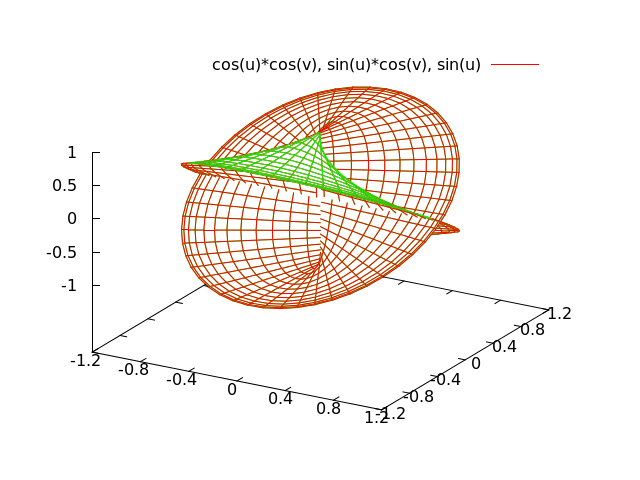

In [74]:
(defun parametric-surfaces-depthorder (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :param 'nil)
    (gp :set :iso 50)
    (gp :set :ztics 0.5)
    (gp :set :xtics 0.4)
    (gp :set :ytics 0.4)
    (gp :set :urange '("[-pi:pi]"))
    (gp :set :vrange '("[-pi:pi]"))
    (gp :set :hidd 'nil)
    (gp :set :pm3d 'depthorder)
    (func-splot "cos(u)*cos(v), sin(u)*cos(v), sin(u)"))
  output)
(png-from-file
 (parametric-surfaces-depthorder "images/parametric-surfaces-depthorder.png"))


#10 Surveying Special Topics



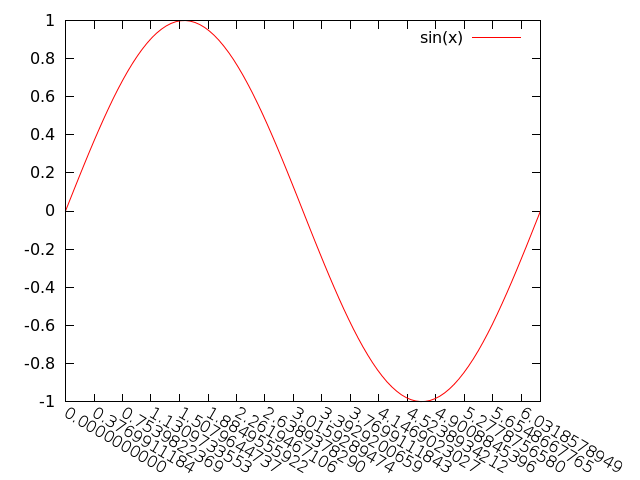

In [75]:
(defun rotate-labels-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :xrange '("[0:2*pi]"))
    (gp :set :xtics '(0 #\, ("0.12*pi") #\, ("2*pi")))
    (gp :set :xtics '(format "%.10f"))
    (gp :set :xtics '(rotate by -30))
    (gp :set :rmargin 10)
    (func-plot "sin(x)"))
  output)
(png-from-file (rotate-labels-plot "images/rotate-labels-plot.png"))


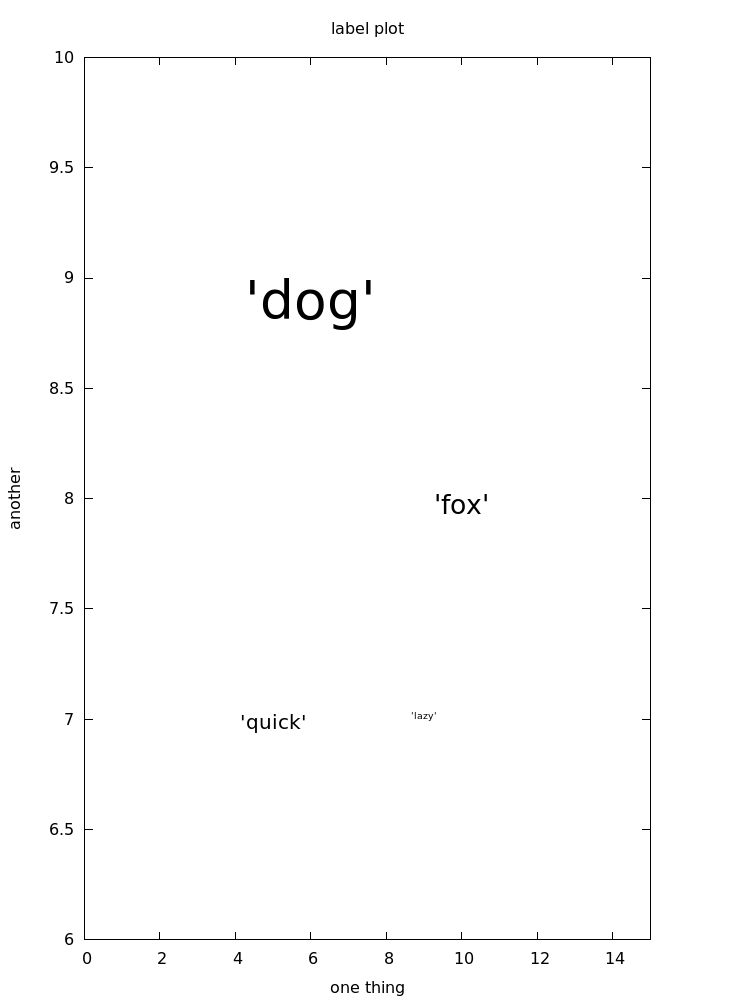

In [76]:
(defun labels-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo enhanced size 750 #\, 1000)
              :title "label plot" :xrange (list "[0:15]") :yrange
              (list "[6:10]"))
    (gp :unset :key)
    (gp :set :rmargin 10)
    (gp :set :xlabel '("'one thing'"))
    (gp :set :ylabel '("'another'"))
    (format t
            "~&countryname(string,size) = sprintf(\"{/=%d %s}\", size, string)~%")
    (plot
     (lambda ()
       (loop for r in '((1 5 7 10 15 24 0.3 "'quick'")
                        (2 10 8 11 20 23 0.4 "'fox'")
                        (3 9 7 11 7 22 0.5 "'lazy'")
                        (4 6 9 10 40 21 0.3 "'dog'"))
             do (format t "~&~{~^~a ~}" r)))
     :using '(2 3 ("(countryname(stringcolumn(8),$5))")) :with 'labels))
  output)
(png-from-file (labels-plot "images/labels-plot.png"))


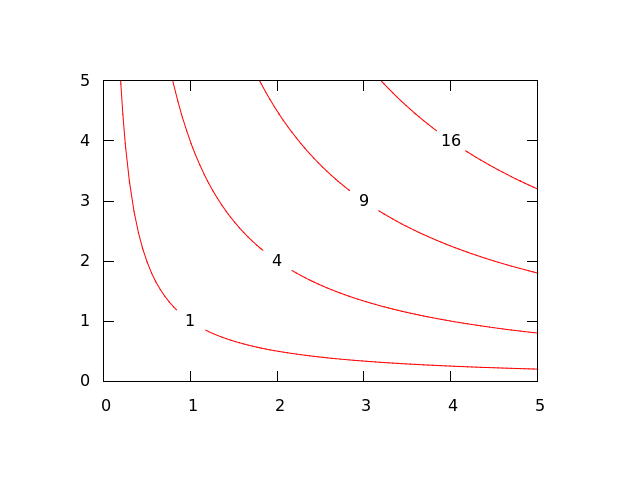

In [77]:
(defun labeled-contour-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output
                           :terminal '(pngcairo)
                           :view :map
                           :contour :base
                           :xrange '("[0:5]")
                           :yrange '("[0:5]")
                           :style '( fill solid)
                           :for '("[n = 1:4]" cntrparam levels discrete ("n**2"))
                           :for '("[n = 1:4]" object n circle at n #\, n size 0.2 front fillcolor rgb ("'#ffffff'") lw 0)
                           :for '("[n = 1:4]" label n
                           ("sprintf(\"%d\", n**2)") at n #\, n
                           center front)
                           )
    (gp :unset :key)
    (gp :unset :surf)
    (gp :unset :clabel)
    (func-splot "x*y")
    )output)
(png-from-file (labeled-contour-plot "images/labeled-contour-plot.png"))


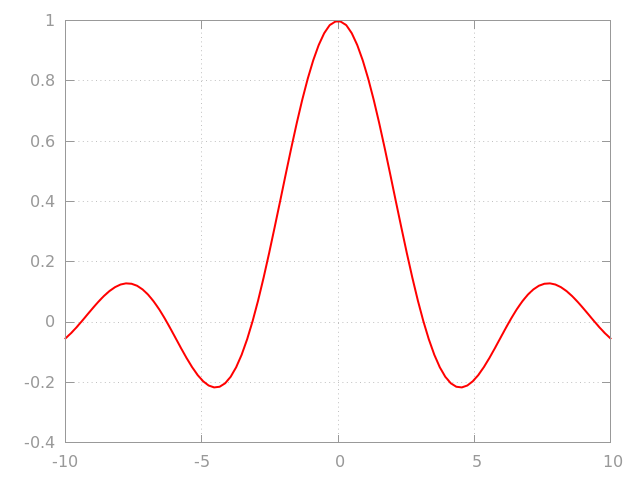

In [78]:
(defun softened-axis-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo) :style
              '(line 2 lc rgb ("'#999999'") lt 0 ("#grid")) :style
              '(line 1 lc rgb ("'#999999'") lt 1 ("#border")) :grid
              '(linestyle 2) :border '(linestyle 1))
    (gp :unset :key)
    (gp :unset :surf)
    (gp :unset :clabel)
    (func-plot "sin(x)/x" :lw 2))
  output)
(png-from-file (softened-axis-plot "images/softened-axis-plot.png"))


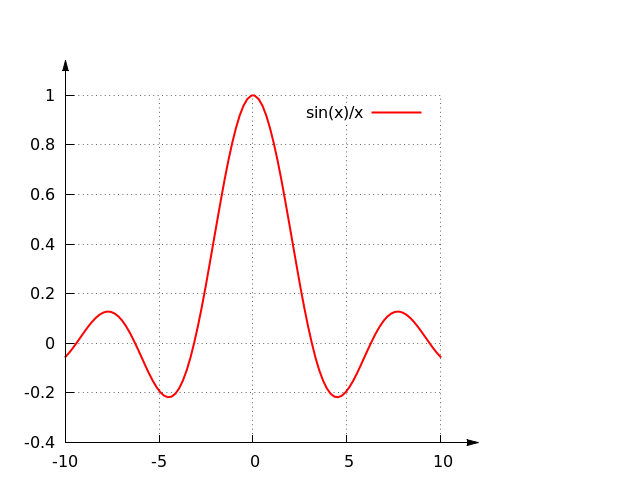

In [79]:
(defun arrow-axis-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo) :arrow
              '(from graph 0 #\, 1 to graph 0 #\, 1.1 filled) :arrow
              '(from graph 1 #\, 0 to graph 1.1 #\, 0 filled) :tmargin 5
              :rmargin 20 :border 3 :tics 'nomirror :grid 'nil)
    (func-plot "sin(x)/x" :lw 2))
  output)
(png-from-file (arrow-axis-plot "images/arrow-axis-plot.png"))


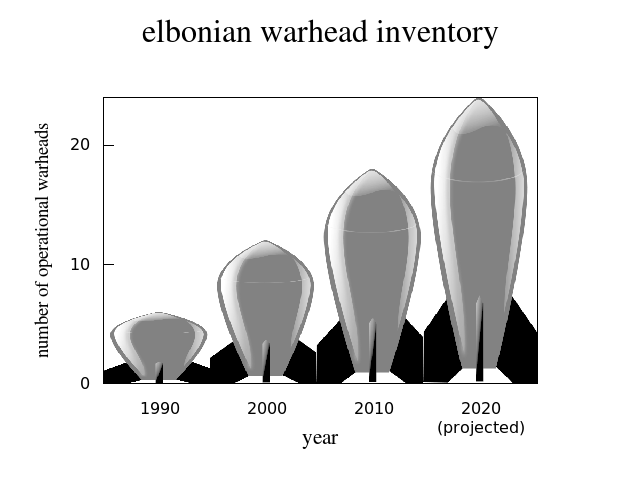

In [80]:
(defun plotting-with-images-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo) :title
              '("\"elbonian warhead inventory\"" font "times,24" offset 0 #\,
                2)
              :xlabel '("" "year" font "times,12") :xlabel
              '("" "year" font "times,16") :ylabel
              '("" "number of operational warheads\\n" font "times,14") :tics
              'nomirror :xtics '(scale 0) :for
              '("[n = 0 : 3]" ytics ("(sprintf(\"%d\" , (n*10)) 200*n)")) :for
              '("[n = 0 : 3]" xtics ("(sprintf(\"%d\" , 1990+10*n) 91+200*n)"))
              :xtics '(add ("(\"2020\\n(projected)\" 691)")) :cbrange
              '("[0:250]") :pal '(gray positive) :view 'map)
    (gp :unset :key)
    (gp :unset :colorbox)
    (func-splot
     " for [n = 0 : 3] 'images/bomb.png' binary filetype=auto center=(91+200*n, 300*0.2*(1+n), 0) dy=0.2*(1+n) with image"))
  output)
(png-from-file
 (plotting-with-images-plot "images/plotting-with-images-plot.png"))


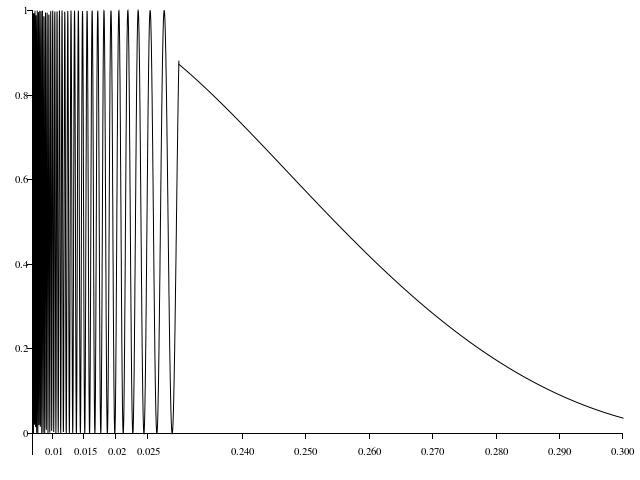

In [81]:
(defun broken-axis-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo font "times,8") :border 2
              :zeroaxis '(lt -1) :ytics '(axis nomirror) :xtics
              '(axis nomirror) :tics 'out :samp 5000 :xrange '("[0.007:.1]")
              :yrange '("[-.05:1]") :xtics '(0.005 #\, 0.005 #\, 0.025) 
              ;:object '("1 fillstyle pattern 5 lw 0") 
              :key '(font "times,12" samplen -1))
    (gp :unset :key)
    (gp :unset :surf)
    (gp :unset :clabel)
    (gp "s" := 0.2)
    (gp "b" := 0.03)
    (gp "w" := 0.001)
    (gp "h" := 1)
    (gp "h(x)" := '("sin(1/x)**2"))
    (gp "f(x)" := '("(x<b?h(x):NaN)"))
    (gp "g(x)" := '("(x>b?h(x+s):NaN)"))
    (gp :set :for
        '("[n = 4 : 10] xtics add(sprintf(\"%.3f\", s + n/100.0) n/100.0)"))
    ;(gp :set :object '("1 polygon from first b-w,-h to b+w,-h to b+w,h to b-w,h to b-w,-h front"))
    (func-plot " f(x) title \"sin(1/x)\" lt -1, g(x) notitle lt -1"))
  output)
(png-from-file (broken-axis-plot "images/broken-axis-plot.png"))


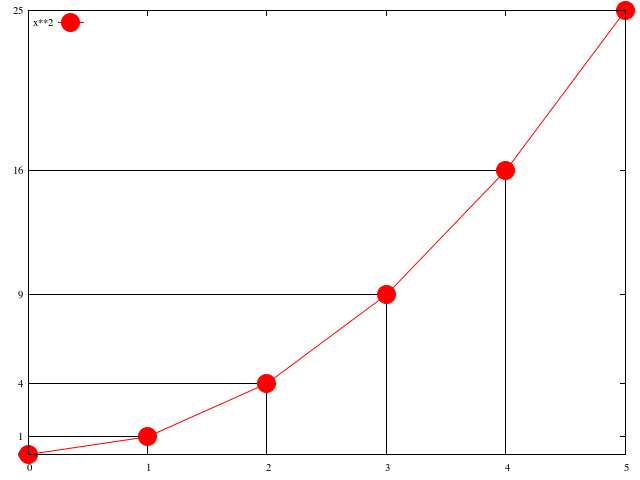

In [82]:
(defun fit-grid-to-data-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo font "times,8") :samples 6
              :key '(top left) :for
              '("[n = 1 : 4] arrow from first n, 0 to first n, n**2 back nohead lt 7")
              :for
              '("[n = 1 : 4] arrow from first 0, n**2 to first n, n**2 back nohead lt 7")
              :for '("[n = 0 : 5] ytics (n**2)"))
    (func-plot "[0:5] x**2 with linespoints pt 7 ps 3"))
  output)
(png-from-file (fit-grid-to-data-plot "images/fit-grid-to-data-plot.png"))


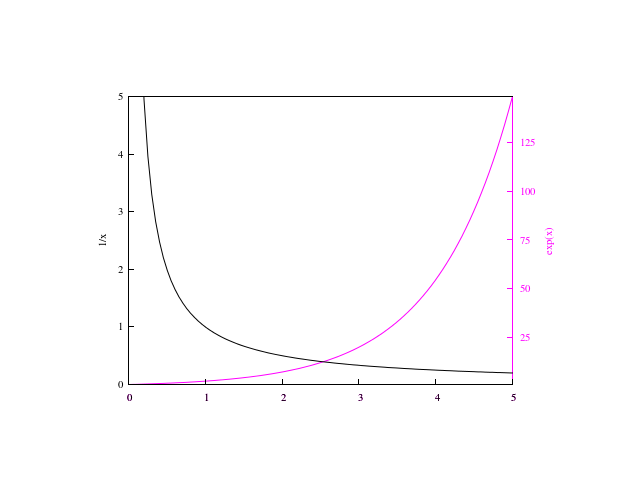

In [83]:
(defun coloring-axis-plot (output)
  (with-plots (*standard-output* :debug nil)
    (gp-setup :output output :terminal '(pngcairo font "times,8") :multiplot
              (list "") :tmargin '(at screen 0.8) :rmargin '(at screen 0.8)
              :lmargin '(at screen 0.2) :bmargin '(at screen 0.2) :tics
              'nomirror :xrange '("[0:5]") :border 8 :border '(lt 4) :y2tics
              '(0 #\, 25 #\, 150) :y2label '("\"exp(x)\"" textcolor lt 4))
    (gp :unset :key)
    (gp :unset :ytics)
    (func-plot "exp(x) axis x1y2 lt 4")
    (gp :set :border 7)
    (gp :set :border '(lt -1))
    (gp :set :ylabel '("\"1/x\"" textcolor lt -1))
    (gp :unset :y2label)
    (gp :set :ytics '(0 #\, 1 #\, 5))
    (gp :set :tics 'nomirror)
    (gp :unset :y2tics)
    (gp :set :yrange '("[0:5]"))
    (gp :unset :y2tics)
    (func-plot "1/x" :lt -1)
    (gp :unset :multiplot))
  output)
(png-from-file (coloring-axis-plot "images/coloring-axis-plot.png"))
